**Table of contents**<a id='toc0_'></a>    
1. [Explorative Datenanalyse](#toc1_)    
1.1. [Zielvariable](#toc1_1_)    
1.1.1. [Korrelationen von Umsatz](#toc1_1_1_)    
1.1.2. [Bivariate Analyse von Umsatz](#toc1_1_2_)    
1.1.3. [kategorische Variablen gegen Umsatz](#toc1_1_3_)    
1.2. [KPIs](#toc1_2_)    
1.2.1. [Verlauf der KPIs](#toc1_2_1_)    
1.2.2. [KPIs nach Tagen](#toc1_2_2_)    
1.2.3. [Irreguläre Tage](#toc1_2_3_)    
1.3. [Promo](#toc1_3_)    
1.3.1. [Korrelationen von Promo](#toc1_3_1_)    
1.3.2. [Jahresverlauf](#toc1_3_2_)    
1.3.3. [Irreguläre Tage](#toc1_3_3_)    
1.4. [Promo2](#toc1_4_)    
1.4.1. [Korrelationen von Promo2](#toc1_4_1_)    
1.4.2. [Jahresverlauf](#toc1_4_2_)    
1.4.3. [Irreguläre Tage](#toc1_4_3_)    
1.4.4. [Promo2 Intervalle](#toc1_4_4_)    
1.4.5. [Dauer Promo2](#toc1_4_5_)    
1.4.6. [Promo2 gegen Promo](#toc1_4_6_)    
1.5. [Wettbewerber](#toc1_5_)    
1.5.1. [Korrelationen von Wettbewerber Distanz](#toc1_5_1_)    
1.5.2. [Einfluss auf KPIs](#toc1_5_2_)    
1.5.3. [Umsatz in Abhängigkeit seit der Öffnung von Wettbwerbern](#toc1_5_3_)    
1.5.4. [Wettbew Distanz und Promo](#toc1_5_4_)    
1.6. [Sortiment](#toc1_6_)    
1.6.1. [Jahresverlauf](#toc1_6_1_)    
1.6.2. [Irreguläre Tage](#toc1_6_2_)    
1.6.3. [Promo](#toc1_6_3_)    
1.7. [Geschäftstyp](#toc1_7_)    
1.7.1. [Jahresverlauf](#toc1_7_1_)    
1.7.2. [Irreguläre Tage](#toc1_7_2_)    
1.7.3. [Promo](#toc1_7_3_)    
1.7.4. [Sortiment](#toc1_7_4_)    
1.7.5. [Sortiment und Promo](#toc1_7_5_)    
1.8. [Bundesländer](#toc1_8_)    
1.8.1. [KPIs](#toc1_8_1_)    
1.8.2. [Geschäftstyp und Sortiment](#toc1_8_2_)    
1.8.3. [Anzahl Filialen pro Bundesland](#toc1_8_3_)    
1.9. [Gruppierung](#toc1_9_)    
1.9.1. [KPIs](#toc1_9_1_)    
1.9.2. [Geschäftstyp und Sortiment](#toc1_9_2_)    
1.9.3. [Anzahl Filialen pro Bundesland](#toc1_9_3_)    
1.10. [Zusammenfassung der EDA](#toc1_10_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=1
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [10]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import time


#plotten
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
import kaleido

from IPython.display import display, HTML
from functools import reduce
import joblib
import pyarrow as pa
from scipy.stats import anderson, randint, ttest_ind
pd.set_option('display.max_columns', None)

# machine Learning
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SelectPercentile, f_regression, RFE, SelectFromModel
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, KFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, make_scorer
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer

# 1. <a id='toc1_'></a>Explorative Datenanalyse [&#9650;](#toc0_)

In [11]:
df_daily = pd.read_parquet("..\\Save_files\\df_daily.parquet", engine='pyarrow')
df_agg = pd.read_parquet("..\\Save_files\\df_agg.parquet", engine='pyarrow')
df_daily_vor_Filterung = pd.read_parquet("..\\Save_files\\df_daily_vor_Filterung.parquet", engine='pyarrow')

## 1.1. <a id='toc1_1_'></a>Zielvariable [&#9650;](#toc0_)

In [12]:
fig = px.histogram(df_daily, x="Umsatz", title=("Verteilung des Umsatzes"))
fig.update_layout(xaxis_title="Umsatz [€]", yaxis_title="Häufigkeit")
fig.show()

### 1.1.1. <a id='toc1_1_1_'></a>Korrelationen von Umsatz [&#9650;](#toc0_)

Nach der Einteilung von Cohen (1988) sind Korrelationen...  
- zwischen r = 0.1 und r = 0.3 als klein bis moderat,  
- Korrelationen zwischen r = 0.3 und r = 0.5 als moderat bis groß
- und ab r = 0.5 als groß einzuordnen.

In [ ]:
numeric = df_daily.select_dtypes(include=["number"])
# Korrelation
df_corr=numeric.corr()

# Korrelation berechnen für den Einfluss der Faktoren auf SalesPerDay
df_corr = round(df_corr["Umsatz"].sort_values().reset_index(), 2)

# Farben basierend auf den Werten zuweisen
df_corr['Korrelation'] = df_corr['Umsatz'].apply(lambda x: 'positiv' if x > 0 else 'negativ')

# Balkendiagramm erstellen
fig = px.bar(df_corr, 
             x='index', 
             y='Umsatz', 
             title='Korrelationen von Umsatz',
             color='Korrelation',
             color_discrete_map={'positiv': 'blue', 'negativ': 'red'},
             text_auto=True)
fig.update_layout(xaxis_title='', yaxis_title="Korrelation", height=700,  width=1200,
                  yaxis_range=[df_corr['Umsatz'].min() - 0.2, 1.2],
                  xaxis_tickfont=dict(size=12, color='black', weight='bold'))
fig.update_traces(textposition='outside', cliponaxis=False)

# Diagramm anzeigen
fig.show()
fig.write_image("..\\Ausgewählte_Plots\\Korrelationen_von_Umsatz.png")


Positiv:
- hohe Korrelation      = ["Kundenzahl"]
- mittlere Korrelation  = ["Promo"]  
  
Negativ:
- niedrige Korrelation  = ["Wochentag", "Promo2_seit_Jahr", "Promo2"]

### 1.1.2. <a id='toc1_1_2_'></a>Bivariate Analyse von Umsatz [&#9650;](#toc0_)

- Alle Daten sind ungleich verteilt
- "Wochentag"                   = meisten haben 6 Tage die Woche geöffnet, manche auch sonntags  
- 'Wettbew_Distanz'             = meisten haben niedrige Distanz zu Wettbewerben  
- 'Wettbew_offen_seit_Monat'    = September sind die meisten Neueröffnungen  
- 'Wettbew_offen_seit_Jahr'     = meisten Wettbewerber haben 2000-2020 geöffnet  
- 'Promo2'                      = mehr Filialen nehmen nicht an Promo2 teil  
- 'Jahr'                        = 2014 fehlen Daten und 2015 noch mehr  

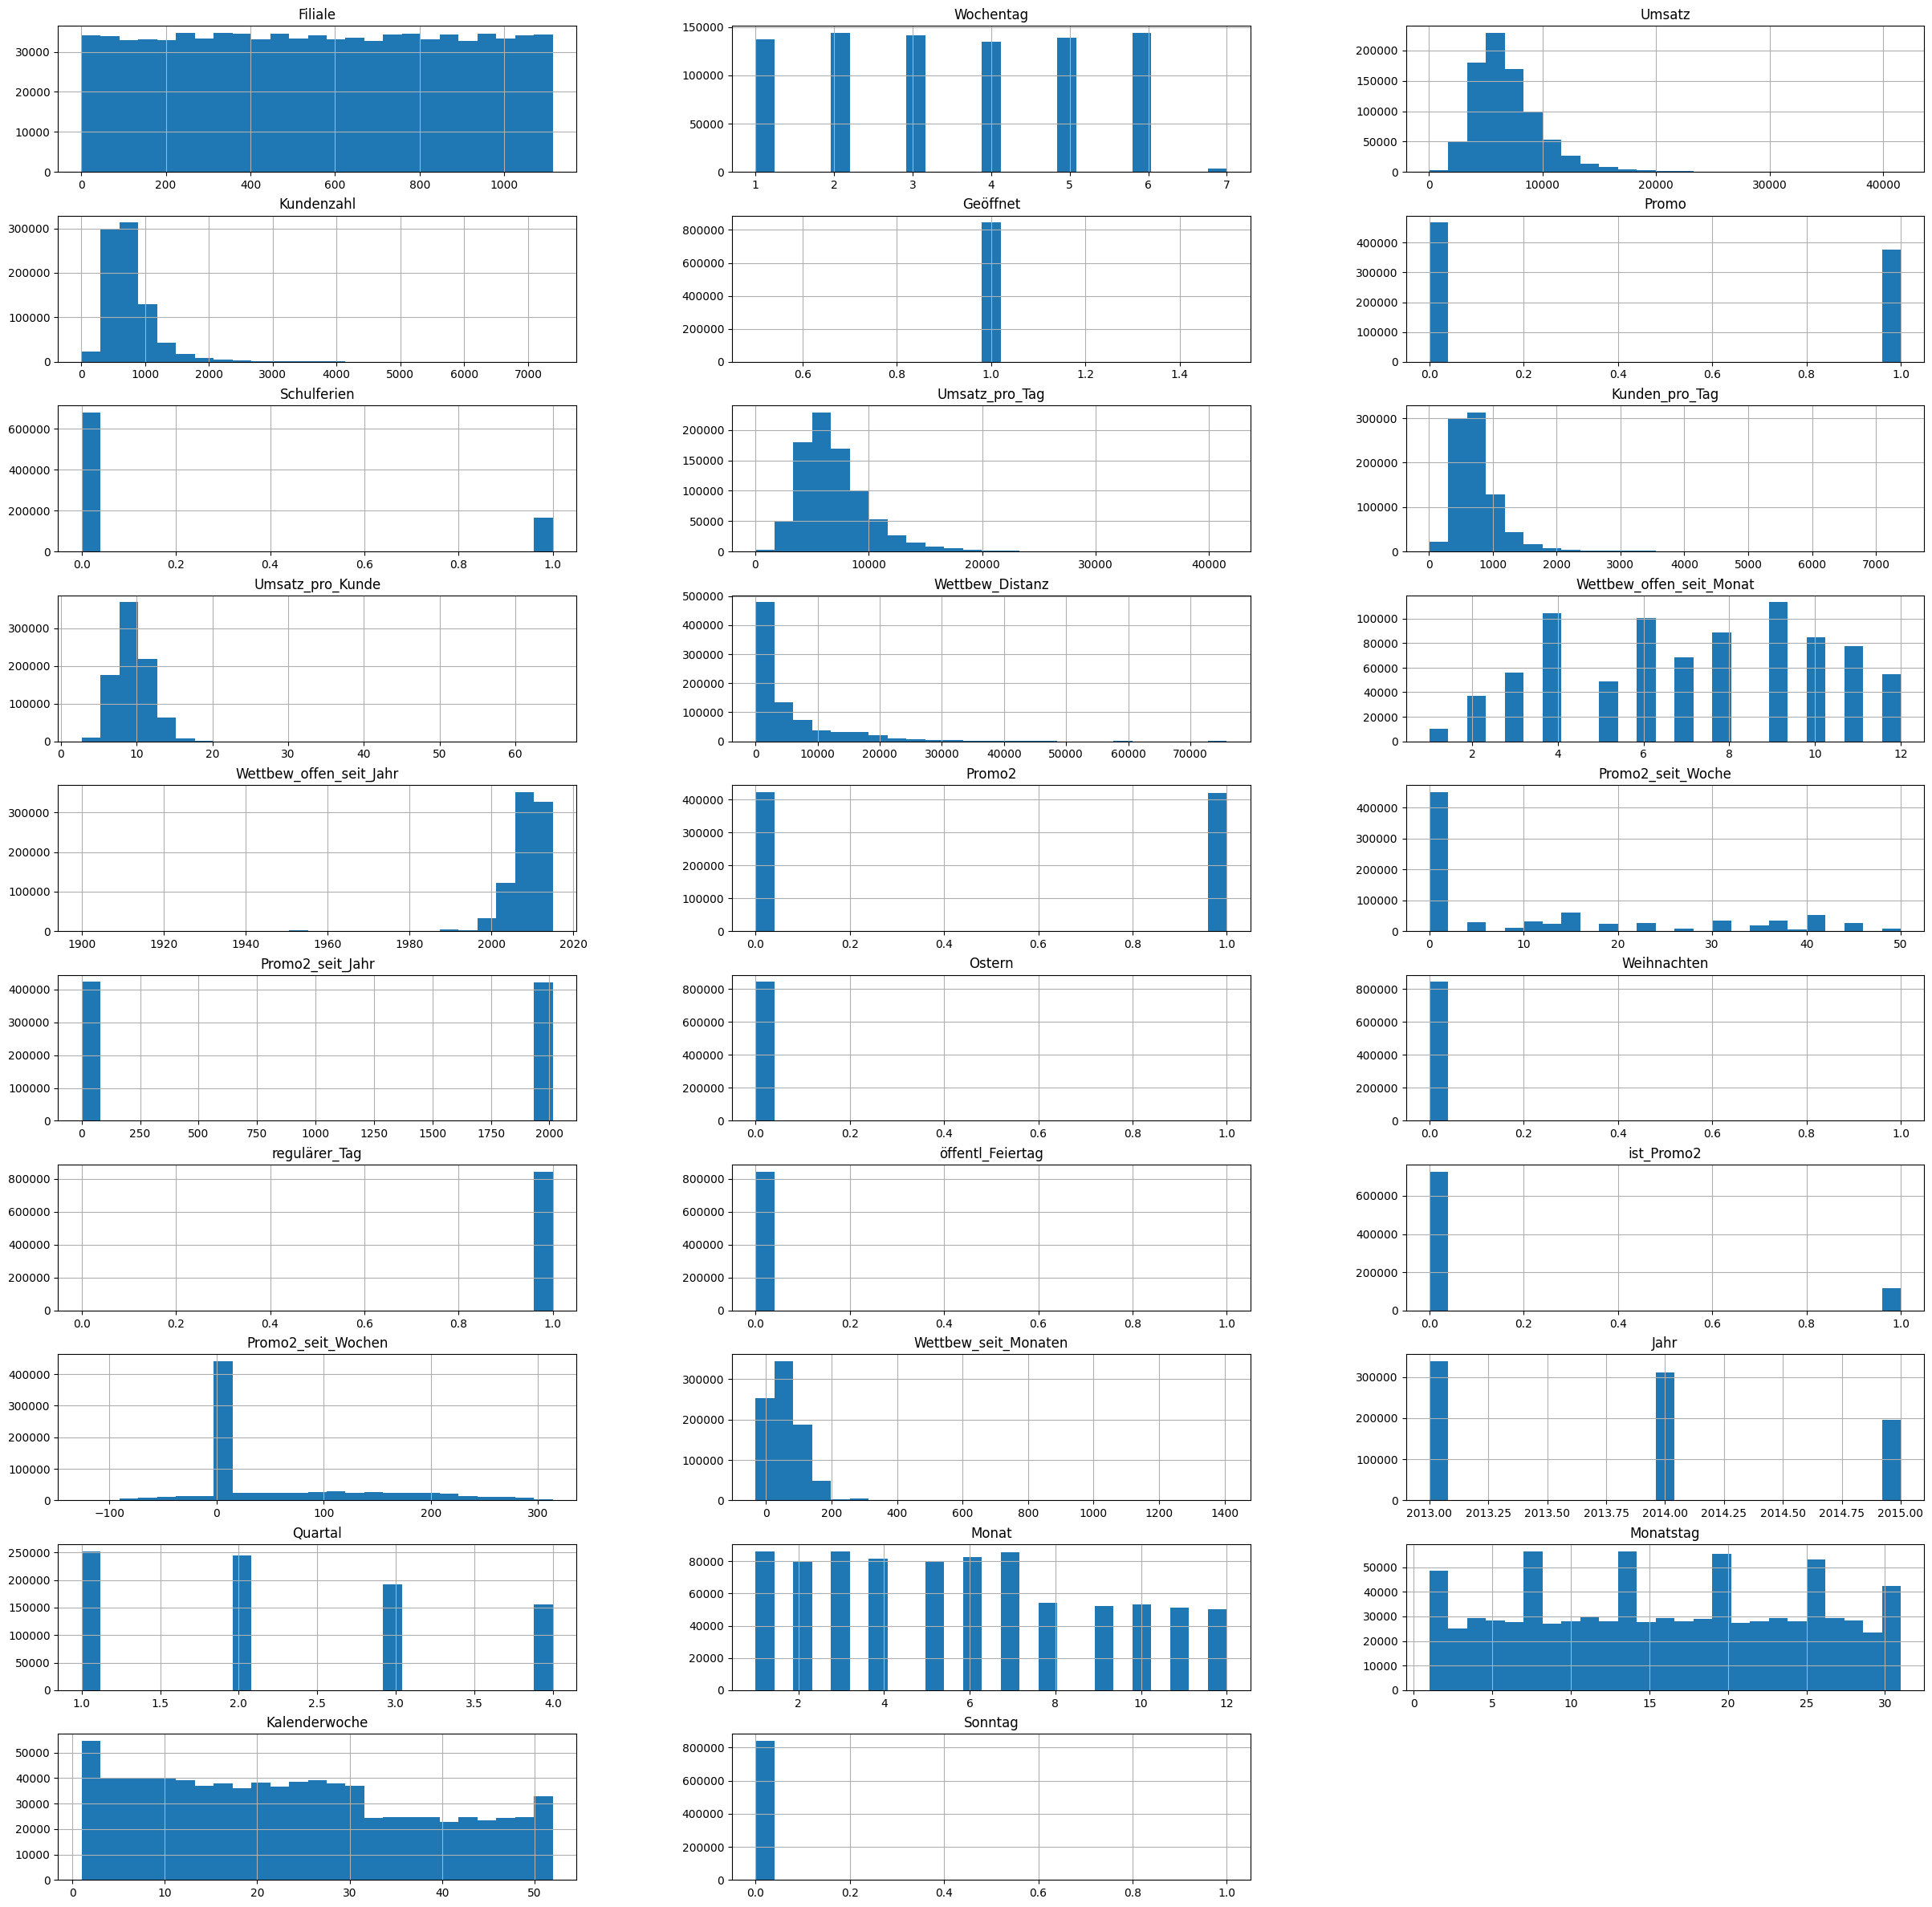

In [ ]:
numerisch = df_daily.select_dtypes(include=["number"])
numerisch.hist(bins = 25, figsize = (30,30), layout = (10,3))
plt.show()

### 1.1.3. <a id='toc1_1_3_'></a>kategorische Variablen gegen Umsatz [&#9650;](#toc0_)

Im folgenden können wir die Summe vom Umsatz für die einzelnen kategorialen Variablen sehen, jedoch ist aufgrund der ungleichen Verteilung ein Vergleich auf Basis von Umsatz nicht möglich. Daher gehen wir im nächsten Abschnitt auf die *key performance indicators* (KPIs) ein.

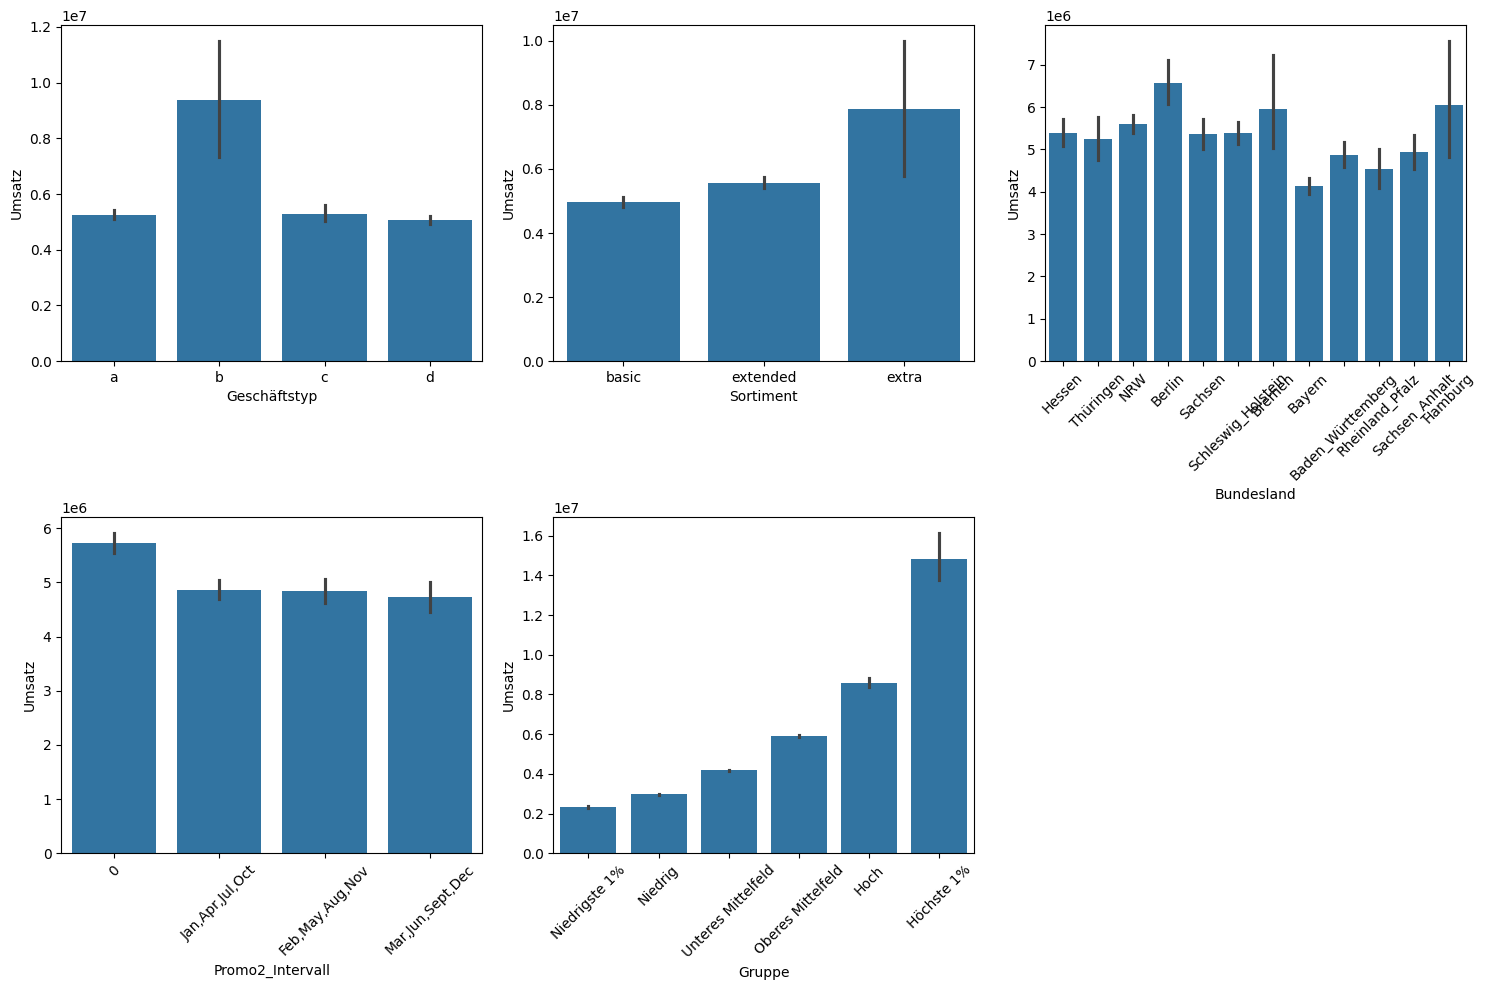

In [ ]:
kategorisch = df_daily.select_dtypes(exclude=["number"])

plt.figure(figsize=(15, 10))

# Geschäftstyp
plt.subplot(2,3,1)
sns.barplot(df_agg.sort_values("Geschäftstyp"), x='Geschäftstyp', y="Umsatz");

# Sortiment
plt.subplot(2,3,2)
sns.barplot(df_agg, x='Sortiment', y="Umsatz");

# Bundesland
plt.subplot(2,3,3)
sns.barplot(df_agg, x='Bundesland', y="Umsatz");
plt.xticks(rotation=45)

# Promo2_Intervall
plt.subplot(2,3,4)
sns.barplot(df_agg, x='Promo2_Intervall', y="Umsatz");
plt.xticks(rotation=45)

# Gruppe
plt.subplot(2,3,5)
sns.barplot(df_agg, x='Gruppe', y="Umsatz");
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 1.2. <a id='toc1_2_'></a>KPIs [&#9650;](#toc0_)

Als *key performance indicators* (KPIs) werden Umsatz pro Tag, Kunden pro Tag und Umsatz pro Kunde verwendet.

### 1.2.1. <a id='toc1_2_1_'></a>Verlauf der KPIs [&#9650;](#toc0_)

Zunächst ist es wichtig zu wissen, wie hoch der Anteil an geschlossenen Filialen ist, sowie in welcher Zeit diese liegen.

In [ ]:
def anteil_schließungen(df):
    # Vergleich der fehlenden Werte wegen Renovierung/Schließung
    df_sales_anteil = df_daily_vor_Filterung.copy()
    df_sales_anteil.set_index("Datum", inplace=True)
    df_sales_anteil = df_sales_anteil.groupby(["Filiale"]).resample("W")["Umsatz"].sum().reset_index()
    df_sales_anteil["Umsatz"] = df_sales_anteil["Umsatz"].replace({0: np.nan, 3: np.nan})
    df_sales_anteil["Woche"] = df_sales_anteil.Datum.dt.isocalendar().week
    df_sales_anteil["Quartal"] = df_sales_anteil.Datum.dt.quarter

        # Funktion zur Berechnung des Anteils der Wochen ohne Verkäufe
    def berechne_anteil(dfx, jahr, quartal):
        dfx_jahr_quartal = dfx[(dfx.Datum.dt.year == jahr) & (dfx.Datum.dt.quarter == quartal)]
        anteil = round(dfx_jahr_quartal.Umsatz.isnull().sum() / dfx_jahr_quartal.Umsatz.count() * 100, 2)
        return anteil

    # Neue Spalte mit dem Anteil der Wochen ohne Verkäufe hinzufügen
    df["Anteil_Schließungen"] = 0.0

    for jahr in [2013, 2014, 2015]:
        for quartal in [1, 2, 3, 4]:
            anteil = berechne_anteil(df_sales_anteil, jahr, quartal)
            df.loc[(jahr, quartal), "Anteil_Schließungen"] = float(anteil)
            if jahr == 2015 and quartal == 3:
                break
    return df

In [ ]:
# Anteil Schließungen
df_tempos_closed = df_daily.groupby(["Jahr", "Quartal"]).agg({"Geöffnet": "sum", "Umsatz": "sum", "Kundenzahl": "sum"})
df_tempos_closed = anteil_schließungen(df_tempos_closed).reset_index()
df_tempos_closed.Quartal = df_tempos_closed.Quartal.astype("str")

px.bar(df_tempos_closed, x="Jahr", y="Anteil_Schließungen", color="Quartal",  barmode="group", text_auto=True,
       title="Anteil der Schließungen pro Quartal wegen Renovierung ", labels={"Anteil_Schließungen": "Anteil Schließungen [%]"}, width=700)

Fast alle Schließungen sind im 3ten und 4ten Quartal des Jahres 2014.

In [ ]:
df_tempos = df_daily.copy()
df_tempos = df_tempos.groupby(["Jahr", "Quartal"]).agg({"Umsatz": "sum", "Kundenzahl": "sum"}).reset_index()
df_tempos.Jahr = df_tempos.Jahr.astype(str)


# Subplots erstellen
fig = make_subplots(rows=1, cols=2, subplot_titles=("Gesamtumsatz","Kunden"))

fig1 = px.bar(df_tempos, x="Quartal", y="Umsatz", color="Jahr", barmode="group")
for trace in fig1['data']:
    trace['showlegend'] = True 
    fig.add_trace(trace, row=1, col=1) 

fig2 = px.bar(df_tempos, x="Quartal", y="Kundenzahl", color="Jahr", barmode="group")
for trace in fig2['data']:
    trace['showlegend'] = False 
    fig.add_trace(trace, row=1, col=2) 
    
fig.update_layout(title_text="Gesamt-Umsatz und -Kunden über 2,5 Jahre", title_font_size=30, title_x=0.5, template="plotly_white",
                  xaxis1_title="Quartal", yaxis1_title="Umsatz [€]",
                  xaxis2_title="", yaxis2_title="Kundenanzahl",
                  legend_title="Jahr")
fig.show()

Der Gesamtumsatz steigt im Laufe des Jahres 2013. Dieser Trend folgt für 2014 und 2015 mit erhöhten Werten. Aufgrund von temporären Schließungen ist der Verkauf im 2ten Halbjahr des Jahres 2014 zurückgegangen. Daten von 2015 gehen nur bis 31.07.2015, weshalb das 3te Quartal so niedrig ausfällt. Als nächstes schauen wir uns den Jahresverlauf der KPIs.

In [ ]:
df_tempos = df_daily.copy()
df_tempos.set_index("Datum", inplace=True)
# Jährlich
df_tempos = df_tempos.resample("W").agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).sort_index().reset_index()
df_tempos["Umsatz_pro_Kunde"] = round(df_tempos["Umsatz_pro_Kunde"], 2)

# normieren auf ersten wert
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_tempos[metriken_normiert] = round(df_tempos[metriken].div(df_tempos[metriken].iloc[0].values) * 100, 2)

# df neu auslegen
df_tempos_melt = pd.melt(df_tempos, id_vars=["Datum"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")

# plotten
fig = px.line(df_tempos_melt, x="Datum", y="Anteil", color="KPIs",
              title = "Jahresverlauf der KPIs", labels={"Anteil": "normierter Anteil [%]", "KPIs": "median KPIs"})

# Variablen in der Legende umbenennen
fig.for_each_trace(lambda trace: trace.update(name=trace.name.replace("Umsatz pro Tag", f"Umsatz pro Tag<br>100 % = {df_tempos.Umsatz_pro_Tag.iloc[0]} €<br>")
                                              .replace("Kunden pro Tag", f"Kunden pro Tag<br>100 % = {df_tempos.Kunden_pro_Tag.iloc[0]} <br>")
                                              .replace("Umsatz pro Kunde", f"Umsatz pro Kunde<br>100 % = {df_tempos.Umsatz_pro_Kunde.iloc[0]} €<br>")
                                              ))
# Vertikale linien für jedes jahr
for year in [2013, 2014, 2015]:
    fig.add_vline(x=pd.Timestamp(f'{year}-01-01'), line=dict(dash='dash', color='gray'))

# jeden 3ten Monat zeigen    
fig.update_xaxes(tickformat="%b\n%Y", dtick="M3")
    
fig.show()
fig.write_image("..\\Ausgewählte_Plots\\Jahresverlauf_der_KPIs.png")

Die KPIs zeigen einen deutlichen Trend in Richtung Weihnachten mit zusätzlichen Peaks im 2ten Quartal. Um den Zeitraum besser zu erkennen, schauen wir uns den Verlauf auf monatlicher Basis an.  


In [ ]:
df_tempos = df_daily.copy()
df_tempos = df_tempos.groupby(["Monat"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).sort_index().reset_index()
df_tempos.Monat = df_tempos.Monat.astype(str)

# normieren auf ersten wert
df_tempos["Umsatz_pro_Kunde"] = round(df_tempos["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_tempos[metriken_normiert] = round(df_tempos[metriken].div(df_tempos[metriken].iloc[0].values) * 100)


# df neu auslegen
df_tempos_melt = pd.melt(df_tempos, id_vars=["Monat"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")

# plotten
fig = px.bar(df_tempos_melt, x="KPIs", y="Anteil", color="Monat", barmode="group", text_auto=True)

fig.update_layout(title_text="median KPIs nach Monat", title_font_size=30, title_x=0.5, template="plotly_white",
                  yaxis1_title="normierter Anteil [%]", yaxis=dict(range=[90, 140]),
                  showlegend=True)
fig.update_xaxes(ticktext=[f"Umsatz pro Tag<br>100 % = {df_tempos.Umsatz_pro_Tag.iloc[0]} €<br>",
                           f"Kunden pro Tag<br>100 % = {df_tempos.Kunden_pro_Tag.iloc[0]} <br>",
                           f"Umsatz pro Kunde<br>100 % = {df_tempos.Umsatz_pro_Kunde.iloc[0]} €<br>"],
                 tickvals=["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"])
# Variablen in der Legende umbenennen

 
fig.show()


Der Umsatz steigt bis Mai, fällt dann bis September auf ein Minimum und erreicht das Maximum von 130 % im Dezember. Um welche Wochen es sich genau habdelt, können wir in der unteren Abbildung sehen.  


In [ ]:
df_tempos = df_daily.copy()
df_tempos = df_tempos.groupby(["Kalenderwoche"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).sort_index().reset_index()


# normieren auf ersten wert
df_tempos["Umsatz_pro_Kunde"] = round(df_tempos["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_tempos[metriken_normiert] = round(df_tempos[metriken].div(df_tempos[metriken].iloc[0].values) * 100, 2)


# df neu auslegen
df_tempos_melt = pd.melt(df_tempos, id_vars=["Kalenderwoche"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")

# plotten
fig = px.bar(df_tempos_melt, x="Kalenderwoche", y="Anteil", color="KPIs", barmode="group", facet_row="KPIs")

fig.update_layout(title_text="median KPIs nach Kalenderwoche", title_font_size=30, title_x=0.5, template="plotly_white",
                  xaxis1_title="Kalenderwoche", yaxis1_title="",
                  yaxis3_title="", yaxis2_title="normierter Anteil [%]",
                  legend_title="median KPIs")

fig.update_traces(width=0.8)
fig.update_xaxes(dtick=4)
# Variablen in der Legende umbenennen
fig.for_each_trace(lambda trace: trace.update(name=trace.name.replace("Umsatz pro Tag", f"Umsatz pro Tag<br>100 % = {df_tempos.Umsatz_pro_Tag.iloc[0]} €<br>")
                                              .replace("Kunden pro Tag", f"Kunden pro Tag<br>100 % = {df_tempos.Kunden_pro_Tag.iloc[0]} <br>")
                                              .replace("Umsatz pro Kunde", f"Umsatz pro Kunde<br>100 % = {df_tempos.Umsatz_pro_Kunde.iloc[0]} €<br>")
                                              ))   
 
fig.show()


Die KPIs sind in der 51ten Woche am Maximum. Das zweite Maximum liegt in Woche 18 (ungefähr zur Osterzeit). Das Minimum liegt in der 42ten Woche.  

### 1.2.2. <a id='toc1_2_2_'></a>KPIs nach Tagen [&#9650;](#toc0_)

Um Trends innerhalb eines Monats und einer Kalenderwoche zu untersuchen, schauen wir und die KPIS nochmals im Detail an.

In [ ]:
df_tempos = df_daily.copy()
df_tempos = df_tempos.groupby(["Monatstag"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).sort_index().reset_index()


# normieren auf ersten wert
df_tempos["Umsatz_pro_Kunde"] = round(df_tempos["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_tempos[metriken_normiert] = round(df_tempos[metriken].div(df_tempos[metriken].iloc[0].values) * 100)


# df neu auslegen
df_tempos_melt = pd.melt(df_tempos, id_vars=["Monatstag"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_tempos_melt.Monatstag = df_tempos_melt.Monatstag.astype("str")

# Plotten
fig= px.bar(df_tempos_melt, x="KPIs", y="Anteil", color="Monatstag", barmode="group", text_auto=True)

# Variablen in der Legende umbenennen
fig.update_layout(title_text="KPIs nach Monatstagen", title_font_size=30, title_x=0.5, template="plotly_white",
                  yaxis1_title="normierter Anteil [%]",
                  yaxis1=dict(range=[71, 104]))

    
fig.update_xaxes(ticktext=[f"Umsatz pro Tag<br>100 % = {df_tempos.Umsatz_pro_Tag.iloc[0]} €<br>",
                           f"Kunden pro Tag<br>100 % = {df_tempos.Kunden_pro_Tag.iloc[0]} <br>",
                           f"Umsatz pro Kunde<br>100 % = {df_tempos.Umsatz_pro_Kunde.iloc[0]} €<br>"],
                 tickvals=["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"])
fig.show()

Der Monat beginnt hoch und fällt bis zum 12ten steil runter. Am 18ten gibt es einen niedrigeren Peak als am Anfang des Monats. Der 30te ist der verkaufsstärkste Tag. Auf Quartalsebene sieht dies etwas anders aus.

In [ ]:
df_tempos = df_daily.copy()
df_tempos = df_tempos.groupby(["Quartal", "Monatstag"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).sort_index().reset_index()


# normieren auf ersten wert
df_tempos["Umsatz_pro_Kunde"] = round(df_tempos["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_tempos[metriken_normiert] = round(df_tempos[metriken].div(df_tempos[metriken].iloc[0].values) * 100)


# df neu auslegen
df_tempos_melt = pd.melt(df_tempos, id_vars=["Quartal", "Monatstag"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_tempos_melt.Monatstag = df_tempos_melt.Monatstag.astype("str")

# Daten neu auslegen
df_tempos_melt = pd.melt(df_tempos, id_vars=["Quartal", "Monatstag"], value_name="Prozent", value_vars=metriken_normiert, var_name="KPI")

# Subplots erstellen
fig = make_subplots(rows=1, cols=2, subplot_titles=("Umsatz pro Tag", "Umsatz pro Kunde"))

df_tempos.Quartal = df_tempos.Quartal.astype("str")
fig1= px.line(df_tempos, x="Monatstag", y="Umsatz pro Tag", color="Quartal")
for trace in fig1["data"]:
    trace["showlegend"]=False
    fig.add_trace(trace, row=1, col=1)

fig2= px.line(df_tempos, x="Monatstag", y="Umsatz pro Kunde", color="Quartal")
for trace in fig2["data"]:
    fig.add_trace(trace, row=1, col=2)
    
# Layout anpassen
fig.update_layout(title_text="KPI für Quartal/Monatstag", title_font_size=30, title_x=0.5, template="plotly_white",
                  xaxis1_title="Monatstag", yaxis1_title="normierter Umsatz pro Tag [€]",
                  xaxis2_title="", yaxis2_title="normierte Umsatz pro Kunde [€]",
                  legend_title="Quartal")



Der Peak in der Mitte des Monats hält ein paar Tage länger im virten Quartal. Quartal 4 hat außerdem von allen Quartalen den höchsten Umsatz am Anfang des Monats. Das Ende des Monats sieht für Quartal 2 am besten aus. Im Weiteren schauen wir uns die KPIS auf Wochenebene an.  

In [ ]:
df_tempos = df_daily.copy()
df_tempos = df_tempos.groupby(["Wochentag"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).sort_index().reset_index()


# normieren auf ersten wert
df_tempos["Umsatz_pro_Kunde"] = round(df_tempos["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_tempos[metriken_normiert] = round(df_tempos[metriken].div(df_tempos[metriken].iloc[0].values) * 100)


# df neu auslegen
df_tempos_melt = pd.melt(df_tempos, id_vars=["Wochentag"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_tempos_melt.Wochentag = df_tempos_melt.Wochentag.astype("str")

# Plotten
fig= px.bar(df_tempos_melt, x="KPIs", y="Anteil", color="Wochentag", barmode="group", text_auto=True)

# Variablen in der Legende umbenennen
fig.update_layout(title_text="KPIs nach Wochentagen", title_font_size=20, title_x=0.5, template="plotly_white",
                  yaxis1_title="normierter Anteil [%]",
                  yaxis1=dict(range=[60, 180]))

    
fig.update_xaxes(ticktext=[f"Umsatz pro Tag<br>100 % = {df_tempos.Umsatz_pro_Tag.iloc[0]} €<br>",
                           f"Kunden pro Tag<br>100 % = {df_tempos.Kunden_pro_Tag.iloc[0]} <br>",
                           f"Umsatz pro Kunde<br>100 % = {df_tempos.Umsatz_pro_Kunde.iloc[0]} €<br>"],
                 tickvals=["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"])
fig.show()

Die meisten Kunden gehen Sonntags zu Rossmann, jedoch ist der Verkaufsstärkste Tag Montag  

### 1.2.3. <a id='toc1_2_3_'></a>Irreguläre Tage [&#9650;](#toc0_)

Wir betrachten die Feiertage ohne Promo und Promo2.

In [ ]:
df_tempos = df_daily.copy()
df_tempos = df_tempos[(df_tempos.ist_Promo2 == 0) & (df_tempos.Promo == 0)]
df_tempos['Feiertag'] = df_tempos[["regulärer_Tag", "Ostern", "Weihnachten", "öffentl_Feiertag"]].idxmax(axis=1)
# Kategorien in der gewünschten Reihenfolge definieren
categories = ["regulärer_Tag", "Ostern", "Weihnachten", "öffentl_Feiertag"]
df_tempos['Feiertag'] = pd.Categorical(df_tempos['Feiertag'], categories=categories, ordered=True)

df_tempos = df_tempos.groupby(["Feiertag"], observed=False).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()



# normieren auf ersten wert
df_tempos["Umsatz_pro_Kunde"] = round(df_tempos["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_tempos[metriken_normiert] = round(df_tempos[metriken].div(df_tempos[metriken].iloc[0].values) * 100)

# df neu auslegen
df_tempos_melt = pd.melt(df_tempos, id_vars=["Feiertag"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")

fig = px.bar(df_tempos_melt, x="KPIs", y="Anteil", color="Feiertag", barmode="group", text_auto="all")

# Variablen in der Legende umbenennen
fig.update_xaxes(ticktext=[f"Umsatz pro Tag<br>100 % = {df_tempos.Umsatz_pro_Tag.iloc[0]} €<br>",
                           f"Kunden pro Tag<br>100 % = {df_tempos.Kunden_pro_Tag.iloc[0]} <br>",
                           f"Umsatz pro Kunde<br>100 % = {df_tempos.Umsatz_pro_Kunde.iloc[0]} €<br>"],
                 tickvals=["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"])
fig.update_layout(title_text="KPIs nach Feiertage", title_font_size=20, title_x=0.5, template="plotly_white",
                  xaxis_title="KPI", yaxis1_title="normierter Anteil [%]",
                  yaxis1=dict(range=[50, 230]))
    
fig.show()

An Weihnachten steigt der Umsatz um 52% und die Kundenzahl steigt mehr als doppelt so hoch wie an einem regulären Tag. Dafür fällt der Umsatz pro Kunde mit einem Tief an öffetlichen Feiertagen. 
Im Vergleich dazu sehen wir unten die Wirkung von Schulferien ohne Promo2 und Promo.  

In [ ]:
df_tempos = df_daily.copy()
df_tempos = df_tempos[(df_tempos.ist_Promo2 == 0) & (df_tempos.Promo == 0)]

df_tempos = df_tempos.groupby(["Schulferien"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_tempos["Umsatz_pro_Kunde"] = round(df_tempos["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_tempos[metriken_normiert] = round(df_tempos[metriken].div(df_tempos[metriken].iloc[0].values) * 100)

# df neu auslegen
df_tempos_melt = pd.melt(df_tempos, id_vars=["Schulferien"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_tempos_melt.Schulferien = df_tempos_melt.Schulferien.replace({0: "regulärer Tag", 1: "Schulferien"})

# Plotten
fig = px.bar(df_tempos_melt, x="KPIs", y="Anteil", color="Schulferien", barmode="group", text_auto="all")

# Variablen in der Legende umbenennen

fig.update_layout(title_text="KPIs nach Schulferien", title_font_size=20, title_x=0.5, template="plotly_white",
                  xaxis_title="KPI", yaxis1_title="normierter Anteil [%]",
                  yaxis1=dict(range=[90, 110]))

fig.update_xaxes(ticktext=[f"Umsatz pro Tag<br>100 % = {df_tempos.Umsatz_pro_Tag.iloc[0]} €<br>",
                           f"Kunden pro Tag<br>100 % = {df_tempos.Kunden_pro_Tag.iloc[0]} <br>",
                           f"Umsatz pro Kunde<br>100 % = {df_tempos.Umsatz_pro_Kunde.iloc[0]} €<br>"],
                 tickvals=["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"])
    
fig.show()



KPIs steigen nur minimal während der Schulferien.  

## 1.3. <a id='toc1_3_'></a>Promo [&#9650;](#toc0_)

### 1.3.1. <a id='toc1_3_1_'></a>Korrelationen von Promo [&#9650;](#toc0_)

In [ ]:
# Korrelation
df_corr=numeric.corr()

# Korrelation berechnen für den Einfluss der Faktoren auf SalesPerDay
df_corr = round(df_corr["Promo"].sort_values().reset_index(), 2)

# Farben basierend auf den Werten zuweisen
df_corr['Korrelation'] = df_corr['Promo'].apply(lambda x: 'positiv' if x > 0 else 'negativ')

# Balkendiagramm erstellen
fig = px.bar(df_corr, 
             x='index', 
             y='Promo', 
             title='Korrelationen von Promo',
             color='Korrelation',
             color_discrete_map={'positiv': 'blue', 'negativ': 'red'},
             text_auto=True)
fig.update_layout(xaxis_title='', yaxis_title="Korrelation")

# Diagramm anzeigen
fig.show()


Promo korrelirt nur wenig mit Kundenzahl und Umsatz_pro_Kunde und mittel mit Umsatz. Eine negative mittlere Korrelation ist bei Wochentag sichtbar.  

### 1.3.2. <a id='toc1_3_2_'></a>Jahresverlauf [&#9650;](#toc0_)

In [ ]:
df_promo = df_daily.copy()
df_promo.set_index("Datum", inplace=True)
df_promo = df_promo[(df_promo.regulärer_Tag == 1) & (df_promo.ist_Promo2 == 0)]
df_promo = df_promo.groupby(["Datum", "Promo"])["Umsatz"].median().reset_index()

# Gleitenden Durchschnitt berechnen
df_promo['Umsatz_rolling'] = df_promo.groupby('Promo')['Umsatz'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
df_promo.Promo = df_promo.Promo.replace({0: "regulärer Tag", 1: "Promo Tag"})

# Liniendiagramm für Umsatz erstellen
fig = px.line(df_promo, x="Datum", y="Umsatz", color="Promo",
              title="Umsatz und Gleitender Durchschnitt in Abhängigkeit von Promo", labels={"Umsatz": "median Umsatz [€]"})

# Linien von px.line gestrichelt machen
for trace in fig.data:
    trace.update(line=dict(dash='dash', width=1), opacity=0.4)

# Gleitenden Durchschnitt als durchgängige Linie hinzufügen
for promo in df_promo['Promo'].unique():
    df_promo_promo = df_promo[df_promo['Promo'] == promo]
    fig.add_trace(go.Scatter(x=df_promo_promo['Datum'], y=df_promo_promo['Umsatz_rolling'], mode='lines', name=f'{promo} (Rolling)', line=dict(dash='solid')))

# Vertikale gestrichelte Linien zu Beginn jedes Jahres hinzufügen
years = pd.to_datetime(df_promo['Datum']).dt.year.unique()
for year in years:
    fig.add_vline(x=pd.Timestamp(f'{year}-01-01'), line=dict(dash='dash', color='gray'))

# Diagramm anzeigen
fig.show()
fig.write_image("..\\Ausgewählte_Plots\\Umsatz_und_Gleitender_Durchschnitt_in_Abhängig_von_Promo.png")

Während Promo läuft ist der Umsatz konsequent höher. Auch Promo weist saisonale Trends auf, besonders zur Weihanchts- und Osternzeit ist der Umsatz höher. Dies wird auf wöchentlicher sicht nochmal deutlicher.  

In [ ]:
# Nur reguläre Tage
df_promo = df_daily.copy()
df_promo = df_promo[(df_promo.regulärer_Tag == 1) & (df_promo.ist_Promo2 == 0)]

df_promo = df_promo.groupby(["Promo", "Monat"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_promo["Umsatz_pro_Kunde"] = round(df_promo["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_promo[metriken_normiert] = round(df_promo[metriken].div(df_promo[metriken].iloc[0].values) * 100)

# df neu auslegen
df_promo_melt = pd.melt(df_promo, id_vars=["Promo", "Monat"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_promo_melt.Promo = df_promo_melt.Promo.replace({0: "regulärer Tag", 1: "Promo Tag"})
df_promo_melt.Monat = df_promo_melt.Monat.astype("str")


#Plotten
fig = px.bar(df_promo_melt, x="Monat", y="Anteil", color="Promo", barmode="group", text_auto=True, facet_row="KPIs")

fig.update_layout(title_text="KPIs nach Promo/Monat", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  yaxis1_title="", yaxis=dict(range=[70, 200]),
                  yaxis2_title="normierter Anteil [%]", yaxis3_title="")



fig.show()

Alle KPIs sind erhöht während Promo läuft. Am meisten Profitiert Umsatz pro Tag. Die Stärkste Wirkung erzielt Promo im Dezember und Juni und April.  

In [ ]:
# Nur reguläre Tage und keine Schulferien
df_promo = df_daily.copy()
df_promo = df_promo[(df_promo.regulärer_Tag == 1) & (df_promo.ist_Promo2 == 0)]

df_promo = df_promo.groupby(["Promo", "Kalenderwoche"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_promo["Umsatz_pro_Kunde"] = round(df_promo["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_promo[metriken_normiert] = round(df_promo[metriken].div(df_promo[metriken].iloc[0].values) * 100)

# df neu auslegen
df_promo_melt = pd.melt(df_promo, id_vars=["Promo", "Kalenderwoche"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_promo_melt.Promo = df_promo_melt.Promo.replace({0: "regulärer Tag", 1: "Promo Tag"})
df_promo_melt.Kalenderwoche = df_promo_melt.Kalenderwoche.astype("str")


#Plotten
fig = px.bar(df_promo_melt, x="Kalenderwoche", y="Anteil", color="Promo", barmode="group", facet_row="KPIs")

fig.update_layout(title_text="KPIs nach Promo/Kalenderwoche", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  yaxis1_title="", yaxis=dict(range=[70, 200]),
                  yaxis2_title="normierter Anteil [%]", yaxis3_title="")



fig.show()

Woche 14 und 51 profitieren am Meisten von der Promo, wobei der Anstieg in Woche 13 am höchsten ist.  
Folgende Wochen haben kein Promo: 1, 7, 9, 11, 24, 26, 28, 30, 31, 32, 42, 44, 50  

In [ ]:
# Nur reguläre Tage 
df_promo = df_daily.copy()
df_promo = df_promo[(df_promo.regulärer_Tag == 1) & (df_promo.ist_Promo2 == 0)]


df_promo = df_promo.groupby(["Promo", "Wochentag"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_promo["Umsatz_pro_Kunde"] = round(df_promo["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_promo[metriken_normiert] = round(df_promo[metriken].div(df_promo[metriken].iloc[0].values) * 100)

# df neu auslegen
df_promo_melt = pd.melt(df_promo, id_vars=["Promo", "Wochentag"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_promo_melt.Promo = df_promo_melt.Promo.replace({0: "regulärer Tag", 1: "Promo Tag"})
df_promo_melt.Wochentag = df_promo_melt.Wochentag.astype("str")


#Plotten
fig = px.bar(df_promo_melt, x="Wochentag", y="Anteil", color="Promo", barmode="group", text_auto=True, facet_row="KPIs")

fig.update_layout(title_text="KPIs nach Promo/Wochentag", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  yaxis1_title="", yaxis=dict(range=[50, 200]),
                  yaxis2_title="normierter Anteil [%]", yaxis3_title="")



fig.show()

Innerhalb der Woche ist zu erkennen, dass Promo nur in der Woche läuft und Montags am Besten.  

### 1.3.3. <a id='toc1_3_3_'></a>Irreguläre Tage [&#9650;](#toc0_)

Hier schauen wir uns an wie Promo auf Feiertage und Schulferien auswirkt. Zunächst auf die Feiertage ohne Promo2.

In [ ]:

# Nur reguläre Tage und keine Schulferien
df_promo = df_daily.copy()
df_promo = df_promo[(df_promo.ist_Promo2 == 0)]

df_promo['Feiertag'] = df_promo[["regulärer_Tag", "Ostern", "Weihnachten", "öffentl_Feiertag"]].idxmax(axis=1)
# Kategorien in der gewünschten Reihenfolge definieren
categories = ["regulärer_Tag", "Ostern", "Weihnachten", "öffentl_Feiertag"]
df_promo['Feiertag'] = pd.Categorical(df_promo['Feiertag'], categories=categories, ordered=True)

df_promo = df_promo.groupby(["Promo", "Feiertag"], observed=False).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_promo["Umsatz_pro_Kunde"] = round(df_promo["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_promo[metriken_normiert] = round(df_promo[metriken].div(df_promo[metriken].iloc[0].values) * 100)

# df neu auslegen
df_promo_melt = pd.melt(df_promo, id_vars=["Promo", "Feiertag"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_promo_melt.Promo = df_promo_melt.Promo.replace({0: "regulärer Tag", 1: "Promo Tag"})
df_promo_melt.Feiertag = df_promo_melt.Feiertag.astype("str")


#Plotten
fig = px.bar(df_promo_melt, x="Feiertag", y="Anteil", color="Promo", barmode="group", text_auto=True, facet_col="KPIs")

fig.update_layout(title_text="KPIs nach Promo/Feiertag", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  xaxis2_title="", yaxis=dict(range=[50, 350]),
                  yaxis1_title="normierter Anteil [%]", xaxis3_title="")




Promo bewirkt eine Steigerung des Umsatzes von 122 % an Ostern und 40% an Feiertagen. An Weihnachten läuft keine Promo.  
Nun schauen wir uns das gleiche in den Schulferien an.  

In [ ]:

# Nur reguläre Tage und keine Schulferien
df_promo = df_daily.copy()
df_promo = df_promo[(df_promo.ist_Promo2 == 0)]

df_promo = df_promo.groupby(["Promo", "Schulferien"], observed=False).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_promo["Umsatz_pro_Kunde"] = round(df_promo["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_promo[metriken_normiert] = round(df_promo[metriken].div(df_promo[metriken].iloc[0].values) * 100)

# df neu auslegen
df_promo_melt = pd.melt(df_promo, id_vars=["Promo", "Schulferien"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_promo_melt.Promo = df_promo_melt.Promo.replace({0: "regulärer Tag", 1: "Promo Tag"})
df_promo_melt.Schulferien = df_promo_melt.Schulferien.astype("str")


#Plotten
fig = px.bar(df_promo_melt, x="Schulferien", y="Anteil", color="Promo", barmode="group", text_auto=True, facet_col="KPIs")

fig.update_layout(title_text="KPIs nach Promo/Schulferien", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  xaxis2_title="", yaxis=dict(range=[70, 150]),
                  yaxis1_title="normierter Anteil [%]", xaxis3_title="")




Promo wirkt sich auch auf die Schulferien deutlich aus.  


## 1.4. <a id='toc1_4_'></a>Promo2 [&#9650;](#toc0_)

### 1.4.1. <a id='toc1_4_1_'></a>Korrelationen von Promo2 [&#9650;](#toc0_)

In [ ]:
# Korrelation
df_corr=numeric.corr()

# Korrelation berechnen für den Einfluss der Faktoren auf SalesPerDay
df_corr = round(df_corr["Promo2"].sort_values().reset_index(), 2)

# Farben basierend auf den Werten zuweisen
df_corr['Korrelation'] = df_corr['Promo2'].apply(lambda x: 'positiv' if x > 0 else 'negativ')

# Balkendiagramm erstellen
fig = px.bar(df_corr, x='index', y='Promo2', color='Korrelation', text_auto=True,
             title='Korrelationen von Promo2', 
             color_discrete_map={'positiv': 'blue', 'negativ': 'red'})
fig.update_layout(xaxis_title='', yaxis_title="Korrelation")

# Diagramm anzeigen
fig.show()


Promo 2 koreliert stark mit Promo2_seit_Jahr, _seit_Woche und _seit_Wochen. Mittlere Korrelation zeigt ist_Promo2 und niedrige Korerlation mit Umsatz_pro-Kunde. Promo2 korreliert wenig negativ mit Umsatz, Wettbew_Distanz und Kundenzahl.  

### 1.4.2. <a id='toc1_4_2_'></a>Jahresverlauf [&#9650;](#toc0_)

In [ ]:
df_promo = df_daily.copy()
df_promo.set_index("Datum", inplace=True)
df_promo = df_promo[(df_promo.regulärer_Tag == 1) & (df_promo.Promo == 0)]
df_promo = df_promo.groupby(["Datum", "ist_Promo2"])["Umsatz"].median().reset_index()

# Gleitenden Durchschnitt berechnen
df_promo['Umsatz_rolling'] = df_promo.groupby('ist_Promo2')['Umsatz'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
df_promo.ist_Promo2 = df_promo.ist_Promo2.replace({0: "regulärer Tag", 1: "ist_Promo2 Tag"})

# Liniendiagramm für Umsatz erstellen
fig = px.line(df_promo, x="Datum", y="Umsatz", color="ist_Promo2",
              title="Umsatz und Gleitender Durchschnitt in Abhängigkeit von ist_Promo2", labels={"Umsatz": "median Umsatz [€]"})

# Linien von px.line gestrichelt machen
for trace in fig.data:
    trace.update(line=dict(dash='dash', width=1), opacity=0.4)

# Gleitenden Durchschnitt als durchgängige Linie hinzufügen
for ist_Promo2 in df_promo['ist_Promo2'].unique():
    df_promo_ist_Promo2 = df_promo[df_promo['ist_Promo2'] == ist_Promo2]
    fig.add_trace(go.Scatter(x=df_promo_ist_Promo2['Datum'], y=df_promo_ist_Promo2['Umsatz_rolling'], mode='lines', name=f'{ist_Promo2} (Rolling)', line=dict(dash='solid')))

# Vertikale gestrichelte Linien zu Beginn jedes Jahres hinzufügen
years = pd.to_datetime(df_promo['Datum']).dt.year.unique()
for year in years:
    fig.add_vline(x=pd.Timestamp(f'{year}-01-01'), line=dict(dash='dash', color='gray'))

# Diagramm anzeigen
fig.show()

Während Promo2 läuft ist der Umsatz konsequent niedriger. Promo2 weist nur leichte saisonale Trends auf, besonders zur Weihanchtszeit. Dies wird auf wöchentlicher sicht nochmal deutlicher. Die Korrelation zeigt aber, dass Umsatz_pro_Kunde für Promo2 wichtiger ist. Daher hier dieser Verlauf.  

In [ ]:
df_promo = df_daily.copy()
df_promo.set_index("Datum", inplace=True)
df_promo = df_promo[(df_promo.regulärer_Tag == 1) & (df_promo.Promo == 0)]
df_promo = df_promo.groupby(["Datum", "ist_Promo2"])["Umsatz_pro_Kunde"].median().reset_index()

# Gleitenden Durchschnitt berechnen
df_promo['Umsatz_pro_Kunde_rolling'] = df_promo.groupby('ist_Promo2')['Umsatz_pro_Kunde'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
df_promo.ist_Promo2 = df_promo.ist_Promo2.replace({0: "regulärer Tag", 1: "ist_Promo2 Tag"})

# Liniendiagramm für Umsatz_pro_Kunde erstellen
fig = px.line(df_promo, x="Datum", y="Umsatz_pro_Kunde", color="ist_Promo2",
              title="Umsatz_pro_Kunde und Gleitender Durchschnitt in Abhängigkeit von ist_Promo2", labels={"Umsatz_pro_Kunde": "median Umsatz_pro_Kunde [€]"})

# Linien von px.line gestrichelt machen
for trace in fig.data:
    trace.update(line=dict(dash='dash', width=1), opacity=0.4)

# Gleitenden Durchschnitt als durchgängige Linie hinzufügen
for ist_Promo2 in df_promo['ist_Promo2'].unique():
    df_promo_ist_Promo2 = df_promo[df_promo['ist_Promo2'] == ist_Promo2]
    fig.add_trace(go.Scatter(x=df_promo_ist_Promo2['Datum'], y=df_promo_ist_Promo2['Umsatz_pro_Kunde_rolling'], mode='lines', name=f'{ist_Promo2} (Rolling)', line=dict(dash='solid')))

# Vertikale gestrichelte Linien zu Beginn jedes Jahres hinzufügen
years = pd.to_datetime(df_promo['Datum']).dt.year.unique()
for year in years:
    fig.add_vline(x=pd.Timestamp(f'{year}-01-01'), line=dict(dash='dash', color='gray'))

# Diagramm anzeigen
fig.show()

Wie erwartet zeigt Promo2 einen Anstieg am Umsatz pro Kunden.  
Als nächstes kommt die Monatsübersicht.  

In [ ]:
# Nur reguläre Tage und keine Schulferien
df_promo = df_daily.copy()
df_promo = df_promo[(df_promo.regulärer_Tag == 1) & (df_promo.Promo == 0)]

df_promo = df_promo.groupby(["ist_Promo2", "Monat"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_promo["Umsatz_pro_Kunde"] = round(df_promo["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_promo[metriken_normiert] = round(df_promo[metriken].div(df_promo[metriken].iloc[0].values) * 100)

# df neu auslegen
df_promo_melt = pd.melt(df_promo, id_vars=["ist_Promo2", "Monat"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_promo_melt.ist_Promo2 = df_promo_melt.ist_Promo2.replace({0: "regulärer Tag", 1: "ist_Promo2 Tag"})
df_promo_melt.Monat = df_promo_melt.Monat.astype("str")


#Plotten
fig = px.bar(df_promo_melt, x="Monat", y="Anteil", color="ist_Promo2", barmode="group", text_auto=True, facet_row="KPIs")

fig.update_layout(title_text="KPIs nach ist_Promo2/Monat", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  yaxis1_title="", yaxis=dict(range=[70, 200]),
                  yaxis2_title="normierter Anteil [%]", yaxis3_title="")



fig.show()

Im März, Mai, September und Dezember läuft keine Promo2. In den Monaten Januar, April, und Juli steigert Promo2 den Umsatz pro Kunden um 9 %.  

In [ ]:
# Nur reguläre Tage und keine Schulferien
df_promo = df_daily.copy()
df_promo = df_promo[(df_promo.regulärer_Tag == 1) & (df_promo.Promo == 0)]

df_promo = df_promo.groupby(["ist_Promo2", "Kalenderwoche"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_promo["Umsatz_pro_Kunde"] = round(df_promo["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_promo[metriken_normiert] = round(df_promo[metriken].div(df_promo[metriken].iloc[0].values) * 100)

# df neu auslegen
df_promo_melt = pd.melt(df_promo, id_vars=["ist_Promo2", "Kalenderwoche"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_promo_melt.ist_Promo2 = df_promo_melt.ist_Promo2.replace({0: "regulärer Tag", 1: "ist_Promo2 Tag"})
df_promo_melt.Kalenderwoche = df_promo_melt.Kalenderwoche.astype("str")


#Plotten
fig = px.bar(df_promo_melt, x="Kalenderwoche", y="Anteil", color="ist_Promo2", barmode="group", facet_row="KPIs")

fig.update_layout(title_text="KPIs nach ist_Promo2/Kalenderwoche", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  yaxis1_title="", yaxis=dict(range=[70, 200]),
                  yaxis2_title="normierter Anteil [%]", yaxis3_title="")



fig.show()

Keine besonderen Trends für Promo2 innerhalb Kalenderwoche. 

In [ ]:
# Nur reguläre Tage und keine Schulferien
df_promo = df_daily.copy()
df_promo = df_promo[(df_promo.regulärer_Tag == 1) & (df_promo.Promo == 0)]

df_promo = df_promo.groupby(["ist_Promo2", "Wochentag"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_promo["Umsatz_pro_Kunde"] = round(df_promo["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_promo[metriken_normiert] = round(df_promo[metriken].div(df_promo[metriken].iloc[0].values) * 100)

# df neu auslegen
df_promo_melt = pd.melt(df_promo, id_vars=["ist_Promo2", "Wochentag"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_promo_melt.ist_Promo2 = df_promo_melt.ist_Promo2.replace({0: "regulärer Tag", 1: "ist_Promo2 Tag"})
df_promo_melt.Wochentag = df_promo_melt.Wochentag.astype("str")


#Plotten
fig = px.bar(df_promo_melt, x="Wochentag", y="Anteil", color="ist_Promo2", barmode="group", text_auto=True, facet_row="KPIs")

fig.update_layout(title_text="KPIs nach ist_Promo2/Wochentag", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  yaxis1_title="", yaxis=dict(range=[45, 200]),
                  yaxis2_title="normierter Anteil [%]", yaxis3_title="")



fig.show()

Promo2 läuft jeden Tag, und erhöht Umsatz_pro_Kunden ungefähr gleich. Außer am Sonntag.  

### 1.4.3. <a id='toc1_4_3_'></a>Irreguläre Tage [&#9650;](#toc0_)

Hier schauen wir uns an wie Promo2 auf Feiertage und Schulferien auswirkt. Zunächst auf die Feiertage ohne Promo.

In [ ]:


df_promo = df_daily.copy()
df_promo = df_promo[(df_promo.Promo == 0)]

df_promo['Feiertag'] = df_promo[["regulärer_Tag", "Ostern", "Weihnachten", "öffentl_Feiertag"]].idxmax(axis=1)
# Kategorien in der gewünschten Reihenfolge definieren
categories = ["regulärer_Tag", "Ostern", "Weihnachten", "öffentl_Feiertag"]
df_promo['Feiertag'] = pd.Categorical(df_promo['Feiertag'], categories=categories, ordered=True)

df_promo = df_promo.groupby(["ist_Promo2", "Feiertag"], observed=False).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_promo["Umsatz_pro_Kunde"] = round(df_promo["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_promo[metriken_normiert] = round(df_promo[metriken].div(df_promo[metriken].iloc[0].values) * 100)

# df neu auslegen
df_promo_melt = pd.melt(df_promo, id_vars=["ist_Promo2", "Feiertag"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_promo_melt.ist_Promo2 = df_promo_melt.ist_Promo2.replace({0: "regulärer Tag", 1: "ist_Promo2 Tag"})
df_promo_melt.Feiertag = df_promo_melt.Feiertag.astype("str")


#Plotten
fig = px.bar(df_promo_melt, x="Feiertag", y="Anteil", color="ist_Promo2", barmode="group", text_auto=True, facet_col="KPIs")

fig.update_layout(title_text="KPIs nach ist_Promo2/Feiertag", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  xaxis2_title="", yaxis=dict(range=[50, 250]),
                  yaxis1_title="normierter Anteil [%]", xaxis3_title="")




Promo2 läuft nicht an Weihnachten. An Ostern führt es zu einem Anstieg des Umsatzes. Ansonsten schadet Promo2 an Feiertagen.
Nun schauen wir uns das gleiche in den Schulferien an.  


In [ ]:

# Nur reguläre Tage und keine Schulferien
df_promo = df_daily.copy()
df_promo = df_promo[(df_promo.Promo == 0)]

df_promo = df_promo.groupby(["ist_Promo2", "Schulferien"], observed=False).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_promo["Umsatz_pro_Kunde"] = round(df_promo["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_promo[metriken_normiert] = round(df_promo[metriken].div(df_promo[metriken].iloc[0].values) * 100)

# df neu auslegen
df_promo_melt = pd.melt(df_promo, id_vars=["ist_Promo2", "Schulferien"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_promo_melt.ist_Promo2 = df_promo_melt.ist_Promo2.replace({0: "regulärer Tag", 1: "ist_Promo2 Tag"})
df_promo_melt.Schulferien = df_promo_melt.Schulferien.astype("str")


#Plotten
fig = px.bar(df_promo_melt, x="Schulferien", y="Anteil", color="ist_Promo2", barmode="group", text_auto=True, facet_col="KPIs")

fig.update_layout(title_text="KPIs nach ist_Promo2/Schulferien", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  xaxis2_title="", yaxis=dict(range=[85, 110]),
                  yaxis1_title="normierter Anteil [%]", xaxis3_title="")




Promo2 wirkt sich leicht auf die Schulferien aus. 

### 1.4.4. <a id='toc1_4_4_'></a>Promo2 Intervalle [&#9650;](#toc0_)

Promo2 läuft je nach Filiale in einem anderen Rhytmus.

In [ ]:
# Nur reguläre Tage ohne Schulferien ohne Promo
df_promo = df_daily[(df_daily.regulärer_Tag == 1) & (df_daily.Promo == 0)].copy()
df_promo = df_promo[df_promo.ist_Promo2 == 1]

df_promo = df_promo.groupby(["Promo2_Intervall"], observed=True).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# weitere spalten täglicher Umsatz, Kunden pro Tag, Umsatz pro Kunde, 
df_promo["Umsatz_pro_Kunde"] = round(df_promo["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_promo[metriken_normiert] = round(df_promo[metriken].div(df_promo[metriken].iloc[0].values) * 100)

# df_promo neu definieren

df_promo_melt = pd.melt(df_promo, id_vars=["Promo2_Intervall"], value_name="Prozent", value_vars=metriken_normiert, var_name="KPI")

# Plotten
fig = px.bar(df_promo_melt, x="KPI", y="Prozent", color="Promo2_Intervall", barmode="group", text_auto=True)

# Layout anpassen
fig.update_layout(title_text="KPI Vergleich der Promo2 Dauer pro Filiale  ", title_font_size=20, title_x=0.5, template="plotly_white",
                  xaxis_title="Dauer der Promo2", yaxis_title="normierter Anteil [%]")

fig.update_xaxes(ticktext=[f"Umsatz pro Tag<br>100 % = {df_promo.Umsatz_pro_Tag.iloc[0]} €<br>",
                           f"Kunden pro Tag<br>100 % = {df_promo.Kunden_pro_Tag.iloc[0]} <br>",
                           f"Umsatz pro Kunde<br>100 % = {df_promo.Umsatz_pro_Kunde.iloc[0]} €<br>"],
                 tickvals=["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"])

fig.show()



Jan,Apr,Jul,Oct Intervall ist in allen KPIs am Besten, jedoch nur leicht. 

### 1.4.5. <a id='toc1_4_5_'></a>Dauer Promo2 [&#9650;](#toc0_)

Promo2 läuft seit unterschiedlich vielen Wochen und könnte einen Einfluss auf die KPIs haben.

In [ ]:
df_promo2 = df_daily.copy()
df_promo2 = df_promo2[df_promo2.Promo2 == 1]

df_promo2 = df_promo2.groupby(["Filiale", "Jahr"], observed=True).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median", "Promo2_seit_Wochen": "last"}).reset_index()

# weitere spalten täglicher Umsatz, Kunden pro Tag, Umsatz pro Kunde, 
df_promo2["Umsatz_pro_Kunde"] = round(df_promo2["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_promo2[metriken_normiert] = round(df_promo2[metriken].div(df_promo2[metriken].iloc[0].values) * 100)

# Plotten
fig = make_subplots(rows=1, cols=3, subplot_titles=("Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"))

# Umsatz pro Tag
fig1 = px.scatter(df_promo2, x="Promo2_seit_Wochen", y="Umsatz_pro_Tag", trendline="ols")
for trace in fig1["data"]:
    trace["line"]["color"] = "red"
    fig.add_trace(trace, 1, 1)

# Kunden pro Tag
fig2 = px.scatter(df_promo2, x="Promo2_seit_Wochen", y="Kunden_pro_Tag", trendline="ols")
for trace in fig2["data"]:
    trace["line"]["color"] = "red"
    fig.add_trace(trace, 1, 2)

# Umsatz pro Kunde
fig3 = px.scatter(df_promo2, x="Promo2_seit_Wochen", y="Umsatz_pro_Kunde", trendline="ols")
for trace in fig3["data"]:
    trace["line"]["color"] = "red"
    fig.add_trace(trace, 1, 3)

# Layout anpassen
fig.update_layout(title_text="Jährliche Filial KPIs gegen Dauer der Promo2", title_font_size=20, title_x=0.5, template="plotly_white",
                  xaxis_title="Promo2 seit Wochen", yaxis_title="Umsatz pro Tag [€]", yaxis2_title="Kunden pro Tag", yaxis3_title="Umsatz pro Kunde [€]")

fig.show()



Mit der Dauer der Promo2 steigt Umsatz pro Tag geringfügig und Umsatz pro Kunde moderat.  

### 1.4.6. <a id='toc1_4_6_'></a>Promo2 gegen Promo [&#9650;](#toc0_)

Hier untersuchen wir, wie sich Promo2 auf Promo auswirkt.

In [ ]:
# Nur Umsätze mit Weihnachten
df_promo2 = df_daily.copy()
df_promo2 = df_promo2[(df_promo2.regulärer_Tag == 1)]

df_promo2 = df_promo2.groupby(["ist_Promo2", "Promo"], observed=True).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# weitere spalten täglicher Umsatz, Kunden pro Tag, Umsatz pro Kunde, 
df_promo2["Umsatz_pro_Kunde"] = round(df_promo2["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_promo2[metriken_normiert] = round(df_promo2[metriken].div(df_promo2[metriken].iloc[0].values) * 100)


# Kombination von Promo und Promo2, sowie umbennen
df_promo2.ist_Promo2 = df_promo2.ist_Promo2.astype("str") 
df_promo2.Promo = df_promo2.Promo.astype("str") 
df_promo2["Kombination Promo+Promo2"] = df_promo2.Promo + " " + df_promo2.ist_Promo2
df_promo2["Kombination Promo+Promo2"] = df_promo2["Kombination Promo+Promo2"].replace({"0 0": "regulärer Tag", "1 0": "nur Promo", "0 1": "nur Promo2", "1 1": "beide aktiv"})

df_promo2_melt = pd.melt(df_promo2, id_vars=["Kombination Promo+Promo2"], value_name="normierter Anteil [%]", value_vars=metriken_normiert, var_name="KPI")

fig = px.bar(df_promo2_melt, color="Kombination Promo+Promo2", y="normierter Anteil [%]", barmode="group", text_auto=True, x="KPI")

fig.update_layout(title_text="Promo gegen Promo2", title_font_size=20, title_x=0.5, template="plotly_white",
                  xaxis_title="Art der Aktion",
                  showlegend=True)


Promo2 und Promo beeinflussen sich gegenseitig. Zusammen reduzieren sie die KPIs im Vergleich zu Promo, außer Umsatz pro Kunde.

## 1.5. <a id='toc1_5_'></a>Wettbewerber [&#9650;](#toc0_)

### 1.5.1. <a id='toc1_5_1_'></a>Korrelationen von Wettbewerber Distanz [&#9650;](#toc0_)

In [ ]:
# Korrelation
df_corr=numeric.corr()

# Korrelation berechnen für den Einfluss der Faktoren auf SalesPerDay
df_corr = round(df_corr["Wettbew_Distanz"].sort_values().reset_index(), 2)

# Farben basierend auf den Werten zuweisen
df_corr['Korrelation'] = df_corr['Wettbew_Distanz'].apply(lambda x: 'positiv' if x > 0 else 'negativ')

# Balkendiagramm erstellen
fig = px.bar(df_corr, 
             x='index', 
             y='Wettbew_Distanz', 
             title='Korrelationen von Wettbew_Distanz',
             color='Korrelation',
             color_discrete_map={'positiv': 'blue', 'negativ': 'red'},
             text_auto=True)
fig.update_layout(xaxis_title='', yaxis_title="Korrelation")

# Diagramm anzeigen
fig.show()


Wettbewerber korrelirt leicht mit Umsatz pro Kunde. Auf der negativen Seite korreliert es leicht mit Promo2 und Kundenzahl, sprich wenn die Wettbewerber Distanz hoch ist, gibt es weniger Promo2.  

### 1.5.2. <a id='toc1_5_2_'></a>Einfluss auf KPIs [&#9650;](#toc0_)

In [ ]:
df_agg.columns

Index(['Filiale', 'Umsatz', 'Kundenzahl', 'Umsatz_pro_Tag', 'Umsatz_pro_Kunde',
       'Kunden_pro_Tag', 'Geöffnet', 'Promo', 'ist_Promo2', 'Schulferien',
       'Ostern', 'Weihnachten', 'öffentl_Feiertag', 'regulärer_Tag', 'Sonntag',
       'Geschäftstyp', 'Sortiment', 'Bundesland', 'Wettbew_Distanz',
       'Wettbew_seit_Monaten', 'Wettbew_offen_seit_Monat',
       'Wettbew_offen_seit_Jahr', 'Promo2', 'Promo2_Intervall',
       'Promo2_seit_Wochen', 'Promo2_seit_Woche', 'Promo2_seit_Jahr',
       'Gruppe'],
      dtype='object')

In [ ]:
df_distanz = df_agg.copy()

# normieren auf ersten wert
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_distanz[metriken_normiert] = round(df_distanz[metriken].div(df_distanz[metriken].iloc[0].values) * 100)

df_distanz_melt = pd.melt(df_distanz, id_vars=["Wettbew_Distanz"], value_name="normierter Anteil [%]", value_vars=metriken_normiert, var_name="KPI")

fig = px.scatter(df_distanz_melt, x="Wettbew_Distanz", y="normierter Anteil [%]", facet_col="KPI", trendline="ols", color="KPI")
fig.update_layout(title_text="KPIs in Verbindung mit Wettbewerber Distanz ", title_font_size=20, title_x=0.5, template="plotly_white",
                  xaxis1_title="Distanz der Wettbewerber [m]",xaxis2_title="", xaxis3_title="",
                  showlegend=False)
fig.show()
fig.write_image("..\\Ausgewählte_Plots\\Einfluss_der_Wettbewerber_Distanz_auf_KPIs.png")

Je weiter Wettbewerber entfernt sind, umso niedriger fällt Umsatz pro Tag und Kunden pro Tag aus, wobei Umsatz pro Kunde steigt  

### 1.5.3. <a id='toc1_5_3_'></a>Umsatz in Abhängigkeit seit der Öffnung von Wettbwerbern [&#9650;](#toc0_)

In [ ]:
df_distanz = df_agg.copy()

# normieren auf ersten wert
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_distanz[metriken_normiert] = round(df_distanz[metriken].div(df_distanz[metriken].iloc[0].values) * 100)

df_distanz_melt = pd.melt(df_distanz, id_vars=["Wettbew_seit_Monaten"], value_name="normierter Anteil [%]", value_vars=metriken_normiert, var_name="KPI")

fig = px.scatter(df_distanz_melt, x="Wettbew_seit_Monaten", y="normierter Anteil [%]", facet_col="KPI", trendline="ols", color="KPI")
fig.update_layout(title_text="KPIs in Verbindung mit Wettbewerber Öffnung seit ", title_font_size=20, title_x=0.5, template="plotly_white",
                  xaxis1_title="Öffnung der Wettbewerber seit [Monaten]",xaxis2_title="", xaxis3_title="",
                  showlegend=False)
fig.show()

Je länger Wettbewerber geöffnet haben, umso höher ist der Umsatz pro Kunde aber umso niedriger der Umsatz pro Tag. Ähnlich zu Wettbewerber Distanz aber milder  

### 1.5.4. <a id='toc1_5_4_'></a>Wettbew Distanz und Promo [&#9650;](#toc0_)

In [ ]:

df_distanz = df_daily.copy()
df_distanz = df_distanz[(df_distanz.regulärer_Tag == 1)]

df_distanz = df_distanz.groupby(["Filiale", "ist_Promo2", "Promo"], observed=True).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median", "Wettbew_Distanz": "last"}).reset_index().sort_index()

# normieren 
df_distanz["Umsatz_pro_Kunde"] = round(df_distanz["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_distanz[metriken_normiert] = round(df_distanz[metriken].div(df_distanz[metriken].iloc[0].values) * 100)

# Kombination von Promo und Promo2, sowie umbennen
df_distanz.ist_Promo2 = df_distanz.ist_Promo2.astype("str") 
df_distanz.Promo = df_distanz.Promo.astype("str") 
df_distanz["Kombination Promo+Promo2"] = df_distanz.Promo + " " + df_distanz.ist_Promo2
df_distanz["Kombination Promo+Promo2"] = df_distanz["Kombination Promo+Promo2"].replace({"0 0": "regulärer Tag", "1 0": "nur Promo", "0 1": "nur Promo2", "1 1": "beide aktiv"})

df_distanz_melt = pd.melt(df_distanz, id_vars=["Kombination Promo+Promo2", "Wettbew_Distanz"], value_name="normierter Anteil [%]", value_vars=metriken_normiert, var_name="KPI")

fig = px.scatter(df_distanz_melt, x="Wettbew_Distanz", color="Kombination Promo+Promo2", y="normierter Anteil [%]", facet_col="KPI", trendline="ols")

fig.update_layout(title_text="Promo gegen Promo2", title_font_size=20, title_x=0.5, template="plotly_white",
                  xaxis1_title="Wettbewerber Distanz [m]",xaxis2_title="", xaxis3_title="",
                  showlegend=True)
fig.show()

Umsatz und Kunden pro Tag fällt mit der Distanz von Wettbwerbern in Promos. Nur Promo2 führt mit höhere Distanz zu einem höheren Umsatz pro Tag, und überholt einen regulären Tag mit höherer Distanz. Promo2 gibt es nicht in Filialen die ca. 25000 m entfernt liegen.  

## 1.6. <a id='toc1_6_'></a>Sortiment [&#9650;](#toc0_)

### 1.6.1. <a id='toc1_6_1_'></a>Jahresverlauf [&#9650;](#toc0_)

In [ ]:
df_assort = df_daily.copy()
df_assort.set_index("Datum", inplace=True)
df_assort = df_assort[(df_assort.regulärer_Tag == 1) & (df_assort.ist_Promo2 == 0) & (df_assort.Promo == 0)]
df_assort = df_assort.groupby(["Datum", "Sortiment"])["Umsatz"].median().reset_index()

# Gleitenden Durchschnitt berechnen
df_assort['Umsatz_rolling'] = df_assort.groupby('Sortiment')['Umsatz'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Liniendiagramm für Umsatz erstellen
fig = px.line(df_assort, x="Datum", y="Umsatz", color="Sortiment",
              title="Umsatz und Gleitender Durchschnitt in Abhängigkeit von Sortiment", labels={"Umsatz": "median Umsatz [€]"})

# Linien von px.line gestrichelt machen
for trace in fig.data:
    trace.update(line=dict(dash='dash', width=1), opacity=0.4)

# Gleitenden Durchschnitt als durchgängige Linie hinzufügen
for Sortiment in df_assort['Sortiment'].unique():
    df_assort_Sortiment = df_assort[df_assort['Sortiment'] == Sortiment]
    fig.add_trace(go.Scatter(x=df_assort_Sortiment['Datum'], y=df_assort_Sortiment['Umsatz_rolling'], mode='lines', name=f'{Sortiment} (Rolling)', line=dict(dash='solid')))

# Vertikale gestrichelte Linien zu Beginn jedes Jahres hinzufügen
years = pd.to_datetime(df_assort['Datum']).dt.year.unique()
for year in years:
    fig.add_vline(x=pd.Timestamp(f'{year}-01-01'), line=dict(dash='dash', color='gray'))

# Diagramm anzeigen
fig.show()

Das Sortiment extra weist den höchsten median Umsatz auf und zeigt den Stärksten Trend.  

In [ ]:
# Nur reguläre Tage
df_assort = df_daily.copy()
df_assort = df_assort[(df_assort.regulärer_Tag == 1) & (df_assort.ist_Promo2 == 0) & (df_assort.Promo == 0)]

df_assort = df_assort.groupby(["Sortiment", "Monat"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_assort["Umsatz_pro_Kunde"] = round(df_assort["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_assort[metriken_normiert] = round(df_assort[metriken].div(df_assort[metriken].iloc[0].values) * 100)

# df neu auslegen
df_assort_melt = pd.melt(df_assort, id_vars=["Sortiment", "Monat"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_assort_melt.Sortiment = df_assort_melt.Sortiment.replace({0: "regulärer Tag", 1: "Sortiment Tag"})
df_assort_melt.Monat = df_assort_melt.Monat.astype("str")


#Plotten
fig = px.bar(df_assort_melt, x="Monat", y="Anteil", color="Sortiment", barmode="group", text_auto=True, facet_row="KPIs")

fig.update_layout(title_text="KPIs nach Sortiment/Monat", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  yaxis1_title="", yaxis=dict(range=[0, 350]),
                  yaxis2_title="normierter Anteil [%]", yaxis3_title="")



fig.show()

Sortiment hat den größten Umsatz pro Tag in Juni und November und ca. 3mal soviele Kunden wie die anderen Sortiment Typen. Sortiment extended schneidet besser ab als basic.  

In [ ]:
# Nur reguläre Tage und keine Schulferien
df_assort = df_daily.copy()
df_assort = df_assort[(df_assort.regulärer_Tag == 1) & (df_assort.ist_Promo2 == 0) & (df_assort.Promo == 0)]

df_assort = df_assort.groupby(["Sortiment", "Kalenderwoche"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_assort["Umsatz_pro_Kunde"] = round(df_assort["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_assort[metriken_normiert] = round(df_assort[metriken].div(df_assort[metriken].iloc[0].values) * 100)

# df neu auslegen
df_assort_melt = pd.melt(df_assort, id_vars=["Sortiment", "Kalenderwoche"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_assort_melt.Sortiment = df_assort_melt.Sortiment.replace({0: "regulärer Tag", 1: "Sortiment Tag"})
df_assort_melt.Kalenderwoche = df_assort_melt.Kalenderwoche.astype("str")


#Plotten
fig = px.bar(df_assort_melt, x="Kalenderwoche", y="Anteil", color="Sortiment", barmode="group", facet_row="KPIs")

fig.update_layout(title_text="KPIs nach Sortiment/Kalenderwoche", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  yaxis1_title="", yaxis=dict(range=[0, 200]),
                  yaxis2_title="normierter Anteil [%]", yaxis3_title="")



fig.show()

Wochen 49 und 47 bringen den meisten Umsatz für Sortiment extra. In Woche 51 erreicht extended fast den Umsatz von extra.  

In [ ]:
# Nur reguläre Tage 
df_assort = df_daily.copy()
df_assort = df_assort[(df_assort.regulärer_Tag == 1) & (df_assort.ist_Promo2 == 0) & (df_assort.Promo == 0)]


df_assort = df_assort.groupby(["Sortiment", "Wochentag"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_assort["Umsatz_pro_Kunde"] = round(df_assort["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_assort[metriken_normiert] = round(df_assort[metriken].div(df_assort[metriken].iloc[0].values) * 100)

# df neu auslegen
df_assort_melt = pd.melt(df_assort, id_vars=["Sortiment", "Wochentag"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_assort_melt.Sortiment = df_assort_melt.Sortiment.replace({0: "regulärer Tag", 1: "Sortiment Tag"})
df_assort_melt.Wochentag = df_assort_melt.Wochentag.astype("str")


#Plotten
fig = px.bar(df_assort_melt, x="Wochentag", y="Anteil", color="Sortiment", barmode="group", text_auto=True, facet_row="KPIs")

fig.update_layout(title_text="KPIs nach Sortiment/Wochentag", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  yaxis1_title="", yaxis=dict(range=[0, 300]),
                  yaxis2_title="normierter Anteil [%]", yaxis3_title="")



fig.show()

Sonntags läuft basic und extra am Besten. Sonst ist Freitag der beste Tag für alle Sortimente. Extended erzielt nur niedrige Einnahmen am Sonntag.  

### 1.6.2. <a id='toc1_6_2_'></a>Irreguläre Tage [&#9650;](#toc0_)

In [ ]:

# Nur reguläre Tage und keine Schulferien
df_assort = df_daily.copy()
df_assort = df_assort[(df_assort.ist_Promo2 == 0) & (df_assort.Promo == 0)]

df_assort['Feiertag'] = df_assort[["regulärer_Tag", "Ostern", "Weihnachten", "öffentl_Feiertag"]].idxmax(axis=1)
# Kategorien in der gewünschten Reihenfolge definieren
categories = ["regulärer_Tag", "Ostern", "Weihnachten", "öffentl_Feiertag"]
df_assort['Feiertag'] = pd.Categorical(df_assort['Feiertag'], categories=categories, ordered=True)

df_assort = df_assort.groupby(["Sortiment", "Feiertag"], observed=False).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_assort["Umsatz_pro_Kunde"] = round(df_assort["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_assort[metriken_normiert] = round(df_assort[metriken].div(df_assort[metriken].iloc[0].values) * 100)

# df neu auslegen
df_assort_melt = pd.melt(df_assort, id_vars=["Sortiment", "Feiertag"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_assort_melt.Sortiment = df_assort_melt.Sortiment.replace({0: "regulärer Tag", 1: "Sortiment Tag"})
df_assort_melt.Feiertag = df_assort_melt.Feiertag.astype("str")


#Plotten
fig = px.bar(df_assort_melt, x="Feiertag", y="Anteil", color="Sortiment", barmode="group", text_auto=True, facet_col="KPIs")

fig.update_layout(title_text="KPIs nach Sortiment/Feiertag", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  xaxis2_title="", yaxis=dict(range=[0, 400]),
                  yaxis1_title="normierter Anteil [%]", xaxis3_title="")




basic schneidet an Feiertagen besser ab als extended, während extra sehr stark von den Feiertagen profitiert.  

In [ ]:

# Nur reguläre Tage und keine Schulferien
df_assort = df_daily.copy()
df_assort = df_assort[(df_assort.ist_Promo2 == 0) & (df_assort.Promo == 0)]

df_assort = df_assort.groupby(["Sortiment", "Schulferien"], observed=False).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_assort["Umsatz_pro_Kunde"] = round(df_assort["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_assort[metriken_normiert] = round(df_assort[metriken].div(df_assort[metriken].iloc[0].values) * 100)

# df neu auslegen
df_assort_melt = pd.melt(df_assort, id_vars=["Sortiment", "Schulferien"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_assort_melt.Sortiment = df_assort_melt.Sortiment.replace({0: "regulärer Tag", 1: "Sortiment Tag"})
df_assort_melt.Schulferien = df_assort_melt.Schulferien.astype("str")


#Plotten
fig = px.bar(df_assort_melt, x="Schulferien", y="Anteil", color="Sortiment", barmode="group", text_auto=True, facet_col="KPIs")

fig.update_layout(title_text="KPIs nach Sortiment/Schulferien", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  xaxis2_title="", yaxis=dict(range=[70, 330]),
                  yaxis1_title="normierter Anteil [%]", xaxis3_title="")




extra läuft in Schulferien schlechter, während die anderen beiden eine leichte Verbesserung sehen.  

### 1.6.3. <a id='toc1_6_3_'></a>Promo [&#9650;](#toc0_)

In [ ]:

df_assort = df_daily.copy()
df_assort = df_assort[(df_assort.regulärer_Tag == 1)]

df_assort = df_assort.groupby(["Sortiment", "ist_Promo2", "Promo"], observed=True).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index().sort_index()

# normieren 
df_assort["Umsatz_pro_Kunde"] = round(df_assort["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_assort[metriken_normiert] = round(df_assort[metriken].div(df_assort[metriken].iloc[0].values) * 100)

# Kombination von Promo und Promo2, sowie umbennen
df_assort.ist_Promo2 = df_assort.ist_Promo2.astype("str") 
df_assort.Promo = df_assort.Promo.astype("str") 
df_assort["Kombination Promo+Promo2"] = df_assort.Promo + " " + df_assort.ist_Promo2
df_assort["Kombination Promo+Promo2"] = df_assort["Kombination Promo+Promo2"].replace({"0 0": "regulärer Tag", "1 0": "nur Promo", "0 1": "nur Promo2", "1 1": "beide aktiv"})


df_assort_melt = pd.melt(df_assort, id_vars=["Kombination Promo+Promo2", "Sortiment"], value_name="normierter Anteil [%]", value_vars=metriken_normiert, var_name="KPI")

fig = px.bar(df_assort_melt, x="Sortiment", y="normierter Anteil [%]", color="Kombination Promo+Promo2", barmode="group", text_auto=True, facet_col="KPI")


fig.update_layout(title_text="Sortiment gegen Promo/Promo2", title_font_size=20, title_x=0.5, template="plotly_white",
                  xaxis1_title="Sortiment",xaxis2_title="", xaxis3_title="",
                  showlegend=True)


Basic und extended profitieren am meisten von den promotions. Während Promo extra verbessert, aber in Kombination mit Promo2 stark versagt.  

## 1.7. <a id='toc1_7_'></a>Geschäftstyp [&#9650;](#toc0_)

### 1.7.1. <a id='toc1_7_1_'></a>Jahresverlauf [&#9650;](#toc0_)

In [ ]:
df_type = df_daily.copy()
df_type.set_index("Datum", inplace=True)
df_type = df_type[(df_type.regulärer_Tag == 1) & (df_type.ist_Promo2 == 0) & (df_type.Promo == 0)]
df_type = df_type.groupby(["Datum", "Geschäftstyp"])["Umsatz"].median().reset_index()

# Gleitenden Durchschnitt berechnen
df_type['Umsatz_rolling'] = df_type.groupby('Geschäftstyp')['Umsatz'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Liniendiagramm für Umsatz erstellen
fig = px.line(df_type, x="Datum", y="Umsatz", color="Geschäftstyp",
              title="Umsatz und Gleitender Durchschnitt in Abhängigkeit von Geschäftstyp", labels={"Umsatz": "median Umsatz [€]"})

# Linien von px.line gestrichelt machen
for trace in fig.data:
    trace.update(line=dict(dash='dash', width=1), opacity=0.4)

# Gleitenden Durchschnitt als durchgängige Linie hinzufügen
for Geschäftstyp in df_type['Geschäftstyp'].unique():
    df_type_Geschäftstyp = df_type[df_type['Geschäftstyp'] == Geschäftstyp]
    fig.add_trace(go.Scatter(x=df_type_Geschäftstyp['Datum'], y=df_type_Geschäftstyp['Umsatz_rolling'], mode='lines', name=f'{Geschäftstyp} (Rolling)', line=dict(dash='solid')))

# Vertikale gestrichelte Linien zu Beginn jedes Jahres hinzufügen
years = pd.to_datetime(df_type['Datum']).dt.year.unique()
for year in years:
    fig.add_vline(x=pd.Timestamp(f'{year}-01-01'), line=dict(dash='dash', color='gray'))

# Diagramm anzeigen
fig.show()

Typ b läuft meisten gegenteilig zu den anderen Filialen, also invertierte Maxima und Minima. Typ b hat außerdem den höchsten median Umsatz. 

In [ ]:
# Nur reguläre Tage
df_type = df_daily.copy()
df_type = df_type[(df_type.regulärer_Tag == 1) & (df_type.ist_Promo2 == 0) & (df_type.Promo == 0)]

df_type = df_type.groupby(["Geschäftstyp", "Monat"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_type["Umsatz_pro_Kunde"] = round(df_type["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_type[metriken_normiert] = round(df_type[metriken].div(df_type[metriken].iloc[0].values) * 100)

# df neu auslegen
df_type_melt = pd.melt(df_type, id_vars=["Geschäftstyp", "Monat"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_type_melt.Geschäftstyp = df_type_melt.Geschäftstyp.replace({0: "regulärer Tag", 1: "Geschäftstyp Tag"})
df_type_melt.Monat = df_type_melt.Monat.astype("str")


#Plotten
fig = px.bar(df_type_melt, x="Monat", y="Anteil", color="Geschäftstyp", barmode="group", text_auto=True, facet_row="KPIs")

fig.update_layout(title_text="KPIs nach Geschäftstyp/Monat", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  yaxis1_title="", yaxis=dict(range=[0, 350]),
                  yaxis2_title="normierter Anteil [%]", yaxis3_title="")



fig.show()

Während Typ b den höchsten Umsatz und Kunden pro Tag hat, hat Typ d den höchsten Umsatz pro Kunden.  

In [ ]:
# Nur reguläre Tage und keine Schulferien
df_type = df_daily.copy()
df_type = df_type[(df_type.regulärer_Tag == 1) & (df_type.ist_Promo2 == 0) & (df_type.Promo == 0)]

df_type = df_type.groupby(["Geschäftstyp", "Kalenderwoche"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_type["Umsatz_pro_Kunde"] = round(df_type["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_type[metriken_normiert] = round(df_type[metriken].div(df_type[metriken].iloc[0].values) * 100)

# df neu auslegen
df_type_melt = pd.melt(df_type, id_vars=["Geschäftstyp", "Kalenderwoche"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_type_melt.Geschäftstyp = df_type_melt.Geschäftstyp.replace({0: "regulärer Tag", 1: "Geschäftstyp Tag"})
df_type_melt.Kalenderwoche = df_type_melt.Kalenderwoche.astype("str")


#Plotten
fig = px.bar(df_type_melt, x="Kalenderwoche", y="Anteil", color="Geschäftstyp", barmode="group", facet_row="KPIs")

fig.update_layout(title_text="KPIs nach Geschäftstyp/Kalenderwoche", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  yaxis1_title="", yaxis=dict(range=[0, 200]),
                  yaxis2_title="normierter Anteil [%]", yaxis3_title="")



fig.show()

Typ b hat sein maximum in Kalenderwoche 48, während die anderen ihr Maximum in KW 51 haben. Trotzdem sind sie niedriger als b.  

In [ ]:
# Nur reguläre Tage 
df_type = df_daily.copy()
df_type = df_type[(df_type.regulärer_Tag == 1) & (df_type.ist_Promo2 == 0) & (df_type.Promo == 0)]


df_type = df_type.groupby(["Geschäftstyp", "Wochentag"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_type["Umsatz_pro_Kunde"] = round(df_type["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_type[metriken_normiert] = round(df_type[metriken].div(df_type[metriken].iloc[0].values) * 100)

# df neu auslegen
df_type_melt = pd.melt(df_type, id_vars=["Geschäftstyp", "Wochentag"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_type_melt.Geschäftstyp = df_type_melt.Geschäftstyp.replace({0: "regulärer Tag", 1: "Geschäftstyp Tag"})
df_type_melt.Wochentag = df_type_melt.Wochentag.astype("str")


#Plotten
fig = px.bar(df_type_melt, x="Wochentag", y="Anteil", color="Geschäftstyp", barmode="group", text_auto=True, facet_row="KPIs")

fig.update_layout(title_text="KPIs nach Geschäftstyp/Wochentag", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  yaxis1_title="", yaxis=dict(range=[0, 300]),
                  yaxis2_title="normierter Anteil [%]", yaxis3_title="")



fig.show()

Typ c hat als einziger Sonntags geschlossen und a sowie d erzielen Sonntag nur ca. die Hälfte. Sonntag ist der erfolgreichste Tag für b.  

### 1.7.2. <a id='toc1_7_2_'></a>Irreguläre Tage [&#9650;](#toc0_)

In [ ]:

# Nur reguläre Tage und keine Schulferien
df_type = df_daily.copy()
df_type = df_type[(df_type.ist_Promo2 == 0) & (df_type.Promo == 0)]

df_type['Feiertag'] = df_type[["regulärer_Tag", "Ostern", "Weihnachten", "öffentl_Feiertag"]].idxmax(axis=1)
# Kategorien in der gewünschten Reihenfolge definieren
categories = ["regulärer_Tag", "Ostern", "Weihnachten", "öffentl_Feiertag"]
df_type['Feiertag'] = pd.Categorical(df_type['Feiertag'], categories=categories, ordered=True)

df_type = df_type.groupby(["Geschäftstyp", "Feiertag"], observed=False).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_type["Umsatz_pro_Kunde"] = round(df_type["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_type[metriken_normiert] = round(df_type[metriken].div(df_type[metriken].iloc[0].values) * 100)

# df neu auslegen
df_type_melt = pd.melt(df_type, id_vars=["Geschäftstyp", "Feiertag"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_type_melt.Geschäftstyp = df_type_melt.Geschäftstyp.replace({0: "regulärer Tag", 1: "Geschäftstyp Tag"})
df_type_melt.Feiertag = df_type_melt.Feiertag.astype("str")


#Plotten
fig = px.bar(df_type_melt, x="Feiertag", y="Anteil", color="Geschäftstyp", barmode="group", text_auto=True, facet_col="KPIs")

fig.update_layout(title_text="KPIs nach Geschäftstyp/Feiertag", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  xaxis2_title="", yaxis=dict(range=[0, 350]),
                  yaxis1_title="normierter Anteil [%]", xaxis3_title="")




Typ c hat auch an Ostern und Weihnachten geschlossen. Während a und d unter den Feiertagen leiden, steigt der Umsatz in b stark an. Typ d hat jedoch den höchsten Umsatz pro Kunden, welcher an den Feiertagen fällt.  

In [ ]:

# Nur reguläre Tage und keine Schulferien
df_type = df_daily.copy()
df_type = df_type[(df_type.ist_Promo2 == 0) & (df_type.Promo == 0)]

df_type = df_type.groupby(["Geschäftstyp", "Schulferien"], observed=False).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_type["Umsatz_pro_Kunde"] = round(df_type["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_type[metriken_normiert] = round(df_type[metriken].div(df_type[metriken].iloc[0].values) * 100)

# df neu auslegen
df_type_melt = pd.melt(df_type, id_vars=["Geschäftstyp", "Schulferien"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")
df_type_melt.Geschäftstyp = df_type_melt.Geschäftstyp.replace({0: "regulärer Tag", 1: "Geschäftstyp Tag"})
df_type_melt.Schulferien = df_type_melt.Schulferien.astype("str")


#Plotten
fig = px.bar(df_type_melt, x="Schulferien", y="Anteil", color="Geschäftstyp", barmode="group", text_auto=True, facet_col="KPIs")

fig.update_layout(title_text="KPIs nach Geschäftstyp/Schulferien", title_font_size=20, title_x=0.5, template="plotly_white", height=700,
                  xaxis2_title="", yaxis=dict(range=[50, 300]),
                  yaxis1_title="normierter Anteil [%]", xaxis3_title="")




Schulferien hat kaum einen Einfluss auf den Geschäftstyp  

### 1.7.3. <a id='toc1_7_3_'></a>Promo [&#9650;](#toc0_)

In [ ]:

df_type = df_daily.copy()
df_type = df_type[(df_type.regulärer_Tag == 1)]

df_type = df_type.groupby(["Geschäftstyp", "ist_Promo2", "Promo"], observed=True).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index().sort_index()

# normieren 
df_type["Umsatz_pro_Kunde"] = round(df_type["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_type[metriken_normiert] = round(df_type[metriken].div(df_type[metriken].iloc[0].values) * 100)

# Kombination von Promo und Promo2, sowie umbennen
df_type.ist_Promo2 = df_type.ist_Promo2.astype("str") 
df_type.Promo = df_type.Promo.astype("str") 
df_type["Kombination Promo+Promo2"] = df_type.Promo + " " + df_type.ist_Promo2
df_type["Kombination Promo+Promo2"] = df_type["Kombination Promo+Promo2"].replace({"0 0": "regulärer Tag", "1 0": "nur Promo", "0 1": "nur Promo2", "1 1": "beide aktiv"})


df_type_melt = pd.melt(df_type, id_vars=["Kombination Promo+Promo2", "Geschäftstyp"], value_name="normierter Anteil [%]", value_vars=metriken_normiert, var_name="KPI")

fig = px.bar(df_type_melt, x="Geschäftstyp", y="normierter Anteil [%]", color="Kombination Promo+Promo2", barmode="group", text_auto=True, facet_col="KPI")


fig.update_layout(title_text="Geschäftstyp gegen Promo/Promo2", title_font_size=20, title_x=0.5, template="plotly_white",
                  xaxis1_title="Geschäftstyp",xaxis2_title="", xaxis3_title="",
                  showlegend=True)
fig.write_image("..\\Ausgewählte_Plots\\KPIs_für_Geschäftstyp_und_Promos.png")
fig.show()

Promo verhält sich realtiv gesehen gleich zum allgemeinen Trend von Promo

### 1.7.4. <a id='toc1_7_4_'></a>Sortiment [&#9650;](#toc0_)

In [ ]:
df_type = df_daily.copy()
df_type = df_type.groupby(["Geschäftstyp", "Sortiment"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren 
df_type["Umsatz_pro_Kunde"] = round(df_type["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_type[metriken_normiert] = round(df_type[metriken].div(df_type[metriken].iloc[0].values) * 100)


# df neu auslegen
df_type_melt = pd.melt(df_type, id_vars=["Geschäftstyp", "Sortiment"], value_name="Prozent", value_vars=metriken_normiert, var_name="KPI")
df_type_melt.Sortiment = df_type_melt.Sortiment.replace({0: "regulärer Tag", 1: "Promo2 Tag"})

fig= px.bar(df_type_melt, x="Geschäftstyp", y="Prozent", color="Sortiment", barmode="group", facet_col="KPI",
            text_auto=True)
 
 # Layout anpassen
fig.update_layout(title_text="KPI für Geschäftstyp/Sortiment", title_font_size=30, title_x=0.5, template="plotly_white",
                  xaxis1_title="Wochentag", xaxis2_title="", xaxis3_title="", yaxis1_title="normierter Anteil [%]",
                  legend_title="Sortiment")


fig.show()


extended erhöht für alle Geschäftstypen den Umsatz, aber am stärksten bei b. extra gibt es nur bei  b, aber hier führt es zur Verschlechterung. a und d basic sind ungefähr gleich. typ d extended hat den höchsten Umsatz pro Kunden  

### 1.7.5. <a id='toc1_7_5_'></a>Sortiment und Promo [&#9650;](#toc0_)

In [ ]:

df_type = df_daily.copy()
df_type = df_type[(df_type.regulärer_Tag == 1)]

df_type = df_type.groupby(["Geschäftstyp", "Sortiment", "ist_Promo2", "Promo"], observed=True).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index().sort_index()

# normieren 
df_type["Umsatz_pro_Kunde"] = round(df_type["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_type[metriken_normiert] = round(df_type[metriken].div(df_type[metriken].iloc[0].values) * 100)

# Kombination von Promo und Promo2, sowie umbennen
df_type.ist_Promo2 = df_type.ist_Promo2.astype("str") 
df_type.Promo = df_type.Promo.astype("str") 
df_type["Kombination Promo+Promo2"] = df_type.Promo + " " + df_type.ist_Promo2
df_type["Kombination Promo+Promo2"] = df_type["Kombination Promo+Promo2"].replace({"0 0": "regulärer Tag", "1 0": "nur Promo", "0 1": "nur Promo2", "1 1": "beide aktiv"})
df_type["Kombination Typ+Sortiment"] = df_type.Geschäftstyp + "-" + df_type.Sortiment


df_type_melt = pd.melt(df_type, id_vars=["Kombination Promo+Promo2", "Kombination Typ+Sortiment"], value_name="normierter Anteil [%]", value_vars=metriken_normiert, var_name="KPI")

fig = px.bar(df_type_melt, x="Kombination Typ+Sortiment", y="normierter Anteil [%]", color="Kombination Promo+Promo2", barmode="group", text_auto=True, facet_row="KPI")


fig.update_layout(title_text="Geschäftstyp/Sortiment gegen Promo/Promo2", title_font_size=20, title_x=0.5, template="plotly_white", height=800,
                  xaxis1_title="Geschäftstyp",xaxis2_title="", xaxis3_title="",
                  showlegend=True)
fig.write_image("..\\Ausgewählte_Plots\\Wirkung_der_Promos_auf_Geschäftstyp_und_Sortiment.png")
fig.show()

in b-extended läuft keine Promo2. Außerdem erzielt dieser den meisten Umsatz an einem regulären Tag und während Promo läuft. Die größten Anstieg erfährt b-basic wenn Promo und Promo2 zusammen laufen.
b-extra leider an Promo2 und beiden zusammen, während Promo eine Erhöhung bringt.  
d_extended hat den höchsten Umsatz pro Kunden für alle Promo Kombinationen.  

## 1.8. <a id='toc1_8_'></a>Bundesländer [&#9650;](#toc0_)

### 1.8.1. <a id='toc1_8_1_'></a>KPIs [&#9650;](#toc0_)

In [ ]:
# Nur reguläre Tage
df_länder = df_daily.copy()

df_länder = df_länder.groupby(["Bundesland"]).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_länder["Umsatz_pro_Kunde"] = round(df_länder["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_länder[metriken_normiert] = round(df_länder[metriken].div(df_länder[metriken].iloc[0].values) * 100)

# df neu auslegen
df_länder_melt = pd.melt(df_länder, id_vars=["Bundesland"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")

#Plotten
fig = px.bar(df_länder_melt, x="Bundesland", y="Anteil", color="Bundesland", barmode="group", text_auto=True, facet_row="KPIs")
fig.update_traces(width=0.8)
fig.update_layout(title_text="KPIs nach Bundesländer", title_font_size=20, title_x=0.5, template="plotly_white", height=700, width=1200,
                  yaxis1_title="", yaxis=dict(range=[60, 150]),
                  yaxis2_title="normierter Anteil [%]", yaxis3_title="")

fig.show()

Der Höchste Umsatz pro Tag ist in Berlin, jedoch hat Bayern den Höchsten Umsatz pro Kunden. Am schlechtesten schneidet Rheinland Pfalz beim Umsatz pro Tag ab, während Hamburg den niedrigsten Umsatz pro Kunden hat.

### 1.8.2. <a id='toc1_8_2_'></a>Geschäftstyp und Sortiment [&#9650;](#toc0_)

In [ ]:

df_type = df_daily.copy()

df_type = df_type.groupby(["Bundesland", "Geschäftstyp", "Sortiment"], observed=True).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index().sort_index()

# normieren 
df_type["Umsatz_pro_Kunde"] = round(df_type["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_type[metriken_normiert] = round(df_type[metriken].div(df_type[metriken].iloc[0].values) * 100)

# Kombination von Typ+Sortiment
df_type["Kombination Typ+Sortiment"] = df_type.Geschäftstyp + "-" + df_type.Sortiment


df_type_melt = pd.melt(df_type, id_vars=["Bundesland", "Kombination Typ+Sortiment"], value_name="normierter Anteil [%]", value_vars=metriken_normiert, var_name="KPI")

fig = px.bar(df_type_melt, x="Bundesland", y="normierter Anteil [%]", color="Kombination Typ+Sortiment", barmode="group", text_auto=True, facet_row="KPI")


fig.update_layout(title_text="Bundesland und Store Kombinationen", title_font_size=20, title_x=0.5, template="plotly_white", height=800,
                  xaxis1_title="Bundesland",yaxis2_title="normierter Anteil [%]", yaxis3_title="", yaxis1_title="",
                  showlegend=True)


Keines der Bundesländer hat alle 9 Kombinationen. Die meisten Kombinationen mit 8 liegen in NRW. B-extendend gibt es nur in Bremen. b-basic in Hambrug hat den höchsten Umsatz pro Tag.  

### 1.8.3. <a id='toc1_8_3_'></a>Anzahl Filialen pro Bundesland [&#9650;](#toc0_)

In [ ]:

df_type = df_agg.copy()

# Kombination von Typ+Sortiment
df_type["Kombination Typ+Sortiment"] = df_type.Geschäftstyp + "-" + df_type.Sortiment

df_type = df_type.groupby(["Bundesland", "Kombination Typ+Sortiment"]).agg({"Filiale": "count"}).reset_index()

fig = px.bar(df_type, x="Bundesland", y="Filiale", color="Kombination Typ+Sortiment", barmode="group", text_auto=True)


fig.update_layout(title_text="Anzahl Filialen pro Bundesland", title_font_size=20, title_x=0.5, template="plotly_white", height=800,
                  xaxis1_title="Geschäftstyp",
                  showlegend=True)


Die meisten Filialen sind in NRW. a-basic ist generell in jedem Bundesland am meisten vertreten, außer Hamburg mit a-extended, Rheinland-Pfalz mit d-basic und Schleswig Holstein mit a-extended.  

## 1.9. <a id='toc1_9_'></a>Gruppierung [&#9650;](#toc0_)

### 1.9.1. <a id='toc1_9_1_'></a>KPIs [&#9650;](#toc0_)

Die Gruppierung erfolgte nach Umsatz pro Tag wlche als die besten klassifiziert wurden.  

In [ ]:
# Nur reguläre Tage
df_länder = df_daily.copy()

df_länder = df_länder.groupby(["Gruppe"], observed=False).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index()

# normieren auf ersten wert
df_länder["Umsatz_pro_Kunde"] = round(df_länder["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_länder[metriken_normiert] = round(df_länder[metriken].div(df_länder[metriken].iloc[0].values) * 100)

# df neu auslegen
df_länder_melt = pd.melt(df_länder, id_vars=["Gruppe"], value_name="Anteil", value_vars=metriken_normiert, var_name="KPIs")

#Plotten
fig = px.bar(df_länder_melt, x="Gruppe", y="Anteil", color="Gruppe", barmode="group", text_auto=True, facet_row="KPIs")
fig.update_traces(width=0.8)
fig.update_layout(title_text="KPIs nach Bundesländer", title_font_size=20, title_x=0.5, template="plotly_white", height=700, width=1200,
                  yaxis1_title="", yaxis=dict(range=[0, 350]),
                  yaxis2_title="normierter Anteil [%]", yaxis3_title="")

fig.show()

### 1.9.2. <a id='toc1_9_2_'></a>Geschäftstyp und Sortiment [&#9650;](#toc0_)

In [ ]:

df_type = df_daily.copy()

df_type = df_type.groupby(["Gruppe", "Geschäftstyp", "Sortiment"], observed=True).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index().sort_index()

# normieren 
df_type["Umsatz_pro_Kunde"] = round(df_type["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_type[metriken_normiert] = round(df_type[metriken].div(df_type[metriken].iloc[0].values) * 100)

# Kombination von Typ+Sortiment
df_type["Kombination Typ+Sortiment"] = df_type.Geschäftstyp + "-" + df_type.Sortiment


df_type_melt = pd.melt(df_type, id_vars=["Gruppe", "Kombination Typ+Sortiment"], value_name="normierter Anteil [%]", value_vars=metriken_normiert, var_name="KPI")

fig = px.bar(df_type_melt, x="Gruppe", y="normierter Anteil [%]", color="Kombination Typ+Sortiment", barmode="group", text_auto=True, facet_row="KPI")


fig.update_layout(title_text="Gruppe und Store Kombinationen", title_font_size=20, title_x=0.5, template="plotly_white", height=800,
                  xaxis1_title="Gruppe",yaxis2_title="normierter Anteil [%]", yaxis3_title="", yaxis1_title="",
                  showlegend=True)


Ein klarer Trend von der Verteilung der Kombinationen ist ersichtlich. Die Top Filialen haben nur d-basic und d-extended, während die schlechstesten a-basic, b-extra und c-basic haben.  

### 1.9.3. <a id='toc1_9_3_'></a>Anzahl Filialen pro Bundesland [&#9650;](#toc0_)

In [ ]:

df_type = df_daily.copy()

df_type = df_type.groupby(["Bundesland", "Gruppe"], observed=True).agg({"Umsatz_pro_Tag": "median", "Kunden_pro_Tag": "median", "Umsatz_pro_Kunde": "median"}).reset_index().sort_index()

# normieren 
df_type["Umsatz_pro_Kunde"] = round(df_type["Umsatz_pro_Kunde"], 2)
metriken = ["Umsatz_pro_Tag", "Kunden_pro_Tag", "Umsatz_pro_Kunde"]
metriken_normiert = ["Umsatz pro Tag", "Kunden pro Tag", "Umsatz pro Kunde"]
df_type[metriken_normiert] = round(df_type[metriken].div(df_type[metriken].iloc[0].values) * 100)


df_type_melt = pd.melt(df_type, id_vars=["Bundesland", "Gruppe"], value_name="normierter Anteil [%]", value_vars=metriken_normiert, var_name="KPI")

fig = px.bar(df_type_melt, x="Bundesland", y="normierter Anteil [%]", color="Gruppe", barmode="group", text_auto=True, facet_row="KPI")


fig.update_layout(title_text="Gruppe und Store Kombinationen", title_font_size=20, title_x=0.5, template="plotly_white", height=800,
                  xaxis1_title="Gruppe",yaxis2_title="normierter Anteil [%]", yaxis3_title="", yaxis1_title="",
                  showlegend=True)


Die Top Filialen sind in Baden Württemberg, Hessen, Rheinland Pfalz und Sachsen-Anhalt. Die schlechtesten sind in Baden Württemberg, Bayern, Hessen, NRW und Rheinland-Pfalz.  

## 1.10. <a id='toc1_10_'></a>Zusammenfassung der EDA [&#9650;](#toc0_)

- Top-Filialen: Baden-Württemberg, Hessen, Rheinland-Pfalz, Sachsen-Anhalt.
- Schlechteste Filialen: Baden-Württemberg, Bayern, Hessen, NRW, Rheinland-Pfalz.
- Top-Filialen haben nur d-basic und d-extended.
- Schlechteste Filialen haben a-basic, b-extra und c-basic.
- Meiste Filialen in NRW
- Höchster Umsatz pro Tag in Berlin, höchster Umsatz pro Kunde in Bayern.
- b-extended hat keine Promo2, erzielt höchsten Umsatz an regulären Tagen und während Promo.
- d-extended hat höchsten Umsatz pro Kunde für alle Promo-Kombinationen.
- Schulferien haben kaum Einfluss auf Umsatz
- Typ b hat höchsten Umsatz und Kunden pro Tag, Typ d höchsten Umsatz pro Kunde.
- Basic und extended profitieren am meisten von Promotions.
- Umsatz und Kunden pro Tag fallen mit der Distanz zu Wettbewerbern
- Promo2 läuft nicht an Weihnachten, erhöht Umsatz an Ostern.
- Umsatz steigt bis Mai, fällt bis September und erreicht Maximum im Dezember.

**Zukünftige Implikationen:**
Regionale Strategien:  
    - Top-Filialen: Fokussierung auf die Optimierung und Erweiterung von d-basic und d-extended Filialen in Baden-Württemberg, Hessen, Rheinland-Pfalz und Sachsen-Anhalt.  
    - Schlechteste Filialen: Analyse und Verbesserung der a-basic, b-extra und c-basic Filialen in den betroffenen Regionen, insbesondere in Bayern und NRW.   
    
Promotionsmanagement:  
    - Saisonale Trends: Anpassung der Promotionsstrategien basierend auf saisonalen Umsatztrends, um den Umsatzrückgang von September bis November zu minimieren.  

Kundensegmentierung:  
    - Typ b und d: Entwicklung gezielter Marketingkampagnen für Typ b (höchster Umsatz und Kunden pro Tag) und Typ d (höchster Umsatz pro Kunde), um deren Stärken weiter zu nutzen.  


**Zukünftige Features für die EDA:**  
Regionale Umsatzanalyse:  
    - Erweiterte Analyse der Umsatzdaten nach Regionen, um spezifische regionale Trends und Muster zu identifizieren.   

Kundenverhaltensanalyse:  
    - Erweiterte Analyse des Kundenverhaltens, um Einblicke in die Präferenzen und das Kaufverhalten verschiedener Kundensegmente zu gewinnen.  

Produktverkaufsanalsye:  
    - Erweiterte Analyse der gewinnbringenden Produkte
